In [12]:
import pandas as pd
import numpy as np

train=pd.read_csv(r'appian-x-iit-madras-hackathon-april-2025\train.csv')
test=pd.read_csv(r'appian-x-iit-madras-hackathon-april-2025\test.csv')

train.replace('Alone', 'Single', inplace=True)
test.replace('Absurd', 'Single', inplace=True)
train.replace('YOLO', 'Single', inplace=True)
test.replace('YOLO', 'Single', inplace=True)
test.replace('Alone', 'Single', inplace=True)

test.replace('Basic', '2n Cycle', inplace=True)
train.replace('Basic', '2n Cycle', inplace=True)
test.replace('Widow', 'Divorced', inplace=True)
train.replace('Widow', 'Divorced', inplace=True)

In [ ]:

#display all columns
pd.set_option('display.max_columns', None)
train.head()

In [ ]:
test.info()

In [ ]:
#unique values in each column
for col in train.columns:
    print(f"{col}: {train[col].nunique()} unique values")

In [ ]:
#print the unique values in the target column
print(train['Education'].unique())

In [ ]:
train['Marital_Status'].unique()

In [2]:
Education = {}
Marital_status = {}
A = train['Education'].unique()
B = train['Marital_Status'].unique()
# A = test['Education'].unique()
# B = test['Marital_Status'].unique()
for i, category in enumerate(A):
    l = [0]*len(A)
    l[i] = 1
    print(f"{i}: {category}")
    Education[category] = l
for i, category in enumerate(B):
    l = [0]*len(B)
    l[i] = 1
    print(f"{i}: {category}")
    Marital_status[category] = l

0: Graduation
1: PhD
2: Master
3: Basic
4: 2n Cycle
0: Single
1: Together
2: Married
3: Divorced
4: Widow


In [ ]:
# Education = {}
# Marital_status = {}
# # A = train['Education'].unique()
# # B = train['Marital_Status'].unique()
# A = test['Education'].unique()
# B = test['Marital_Status'].unique()
# for i, category in enumerate(A):
#     l = [0]*len(A)
#     l[i] = 1
#     print(f"{i}: {category}")
#     Education[category] = l
# for i, category in enumerate(B):
#     l = [0]*len(B)
#     l[i] = 1
#     print(f"{i}: {category}")
#     Marital_status[category] = l

In [ ]:
Education

In [ ]:
Marital_status

In [3]:
train['Dt_Customer_1'] = pd.to_datetime(train['Dt_Customer'],format='mixed')
train['Dt_Customer_1'] = train['Dt_Customer_1']-min(train['Dt_Customer_1'])
train['Dates']=train['Dt_Customer_1'].dt.days
# train['Marital_Status'] = train['Marital_Status'].map(Marital_status)
# train['Education'] = train['Education'].map(Education)

test['Dt_Customer_1'] = pd.to_datetime(test['Dt_Customer'],format='mixed')
test['Dt_Customer_1'] = test['Dt_Customer_1']-min(test['Dt_Customer_1'])
test['Dates']=test['Dt_Customer_1'].dt.days
# test['Marital_Status'] = test['Marital_Status'].map(Marital_status)
# test['Education'] = test['Education'].map(Education)


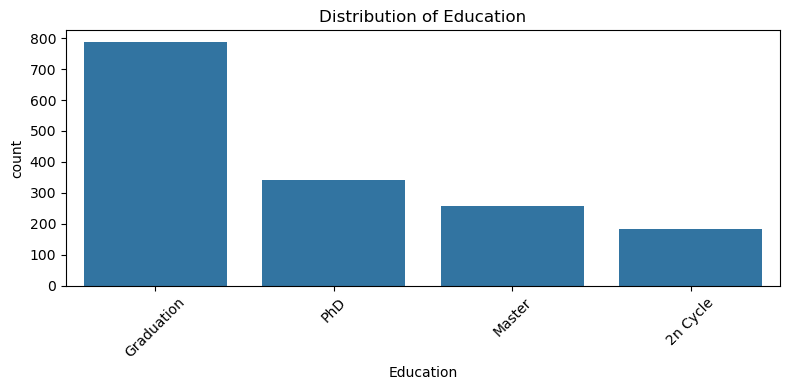

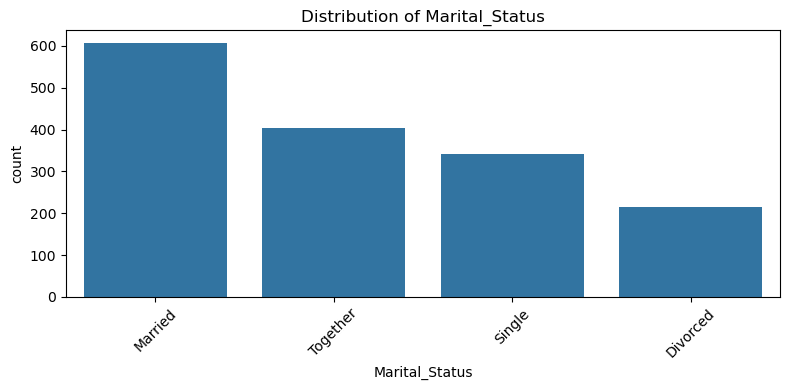

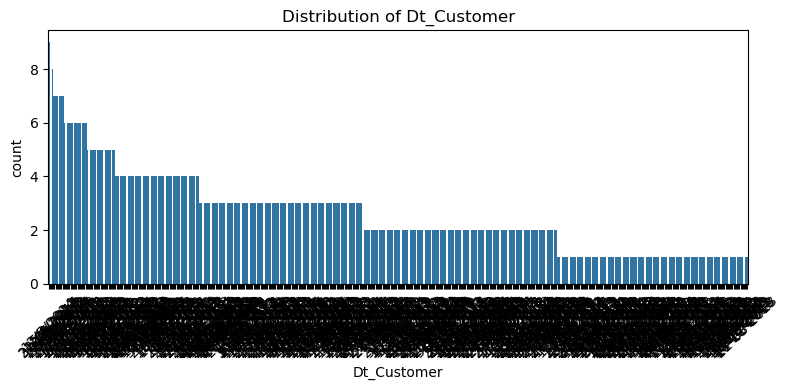

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df = train.copy()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [8]:
pd.get_dummies(df, columns=["Education"], drop_first=True)


ID  Year_Birth Marital_Status   Income  Kidhome  Teenhome  \
0      5524        1957         Single  58138.0        0         0   
1      2174        1954         Single  46344.0        1         1   
2      4141        1965       Together  71613.0        0         0   
3      6182        1984       Together  26646.0        1         0   
4      5324        1981        Married  58293.0        1         0   
...     ...         ...            ...      ...      ...       ...   
1562   9530        1988        Married  24645.0        1         0   
1563   4828        1954       Divorced  79865.0        0         1   
1564  10699        1985        Married  44322.0        1         0   
1565   1497        1952         Single  47958.0        0         1   
1566   7476        1964         Single  63972.0        0         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  Complain  Z_CostContact  \
0       4/9/2012       58     635.0         88  ...         0              3   
1       8/3/2014       38      11.0          1  ...         0              3   
2     21-08-2013       26     426.0         49  ...         0              3   
3      10/2/2014       26      11.0          4  ...         0              3   
4     19-01-2014       94     173.0         43  ...         0              3   
...          ...      ...       ...        ...  ...       ...            ...   
1562   1/11/2012       16       5.0          3  ...         0              3   
1563  18-06-2014       12      71.0         99  ...         0              3   
1564  16-06-2014       30      46.0          0  ...         0              3   
1565  19-01-2013        8     268.0         11  ...         0              3   
1566   2/12/2012       93     928.0         63  ...         0              3   

      Z_Revenue  Target  Dt_Customer_1  Dates  Education_Basic  \
0            11       1        92 days     92            False   
1            11       0       938 days    938            False   
2            11       1       591 days    591            False   
3            11       0       998 days    998            False   
4            11       0       742 days    742            False   
...         ...     ...            ...    ...              ...   
1562         11       0         3 days      3            False   
1563         11       1       892 days    892            False   
1564         11       0       890 days    890            False   
1565         11       1       377 days    377            False   
1566         11       1        35 days     35            False   

      Education_Graduation  Education_Master  Education_PhD  
0                     True             False          False  
1                     True             False          False  
2                     True             False          False  
3                     True             False          False  
4                    False             False           True  
...                    ...               ...            ...  
1562                  True             False          False  
1563                  True             False          False  
1564                  True             False          False  
1565                  True             False          False  
1566                 False              True          False  

[1567 rows x 34 columns]

In [10]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import torch

classes = np.unique(df['Target'])  # ensure you get all present classes
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=classes,
                                     y=df['Target'])

# Convert to tensor
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float32)

In [11]:
class_weights

array([0.81614583, 1.2907743 ])

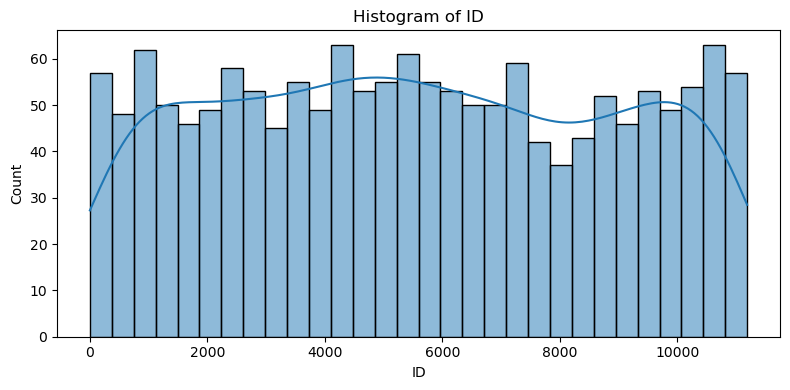

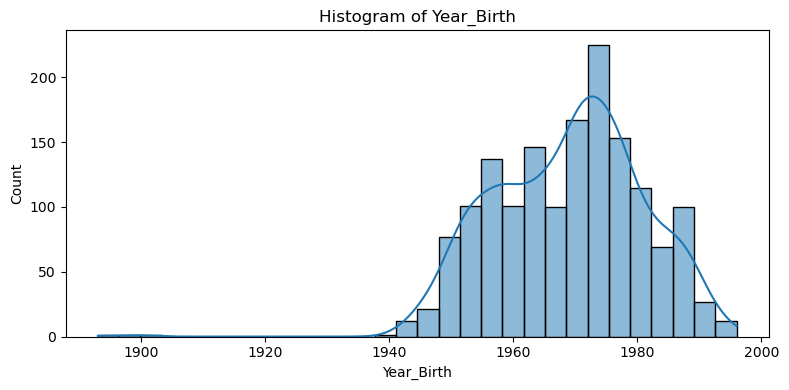

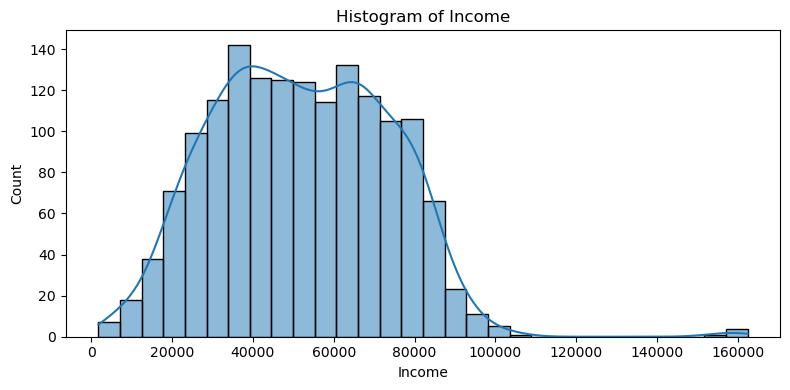

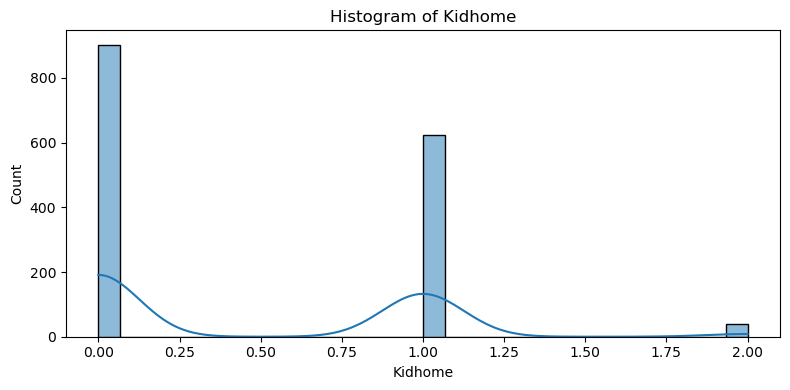

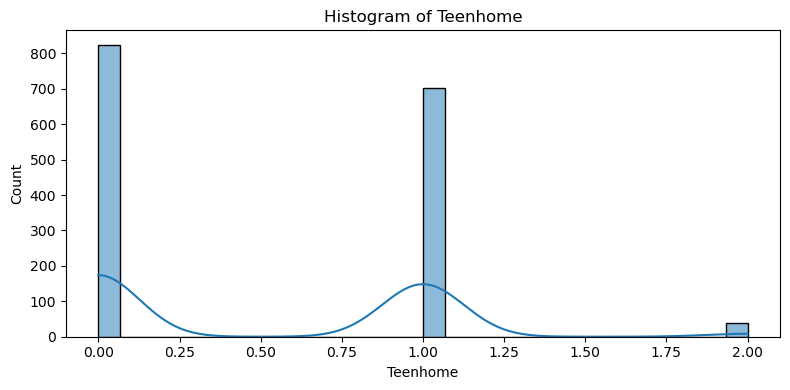

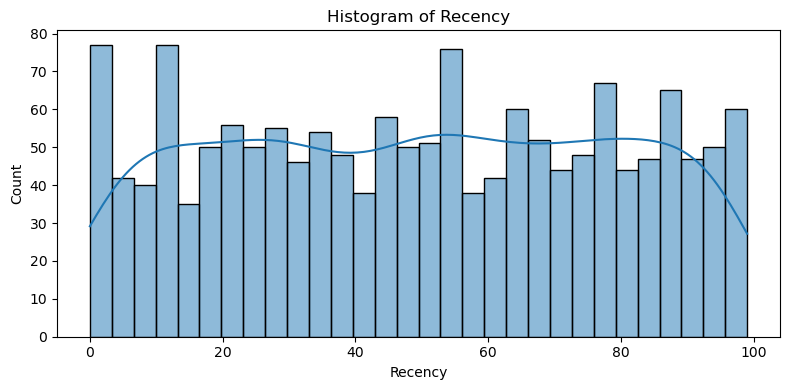

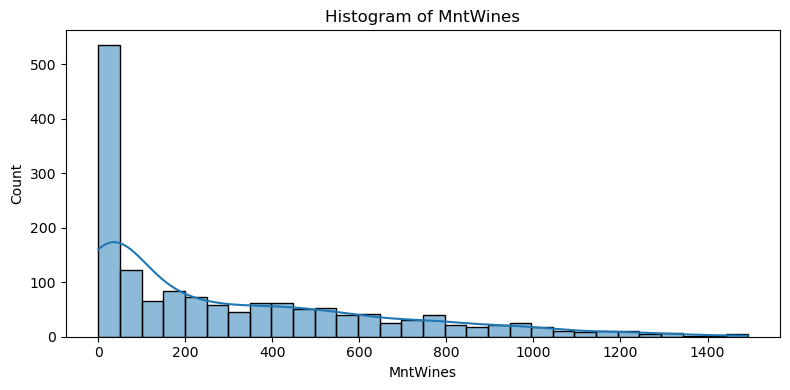

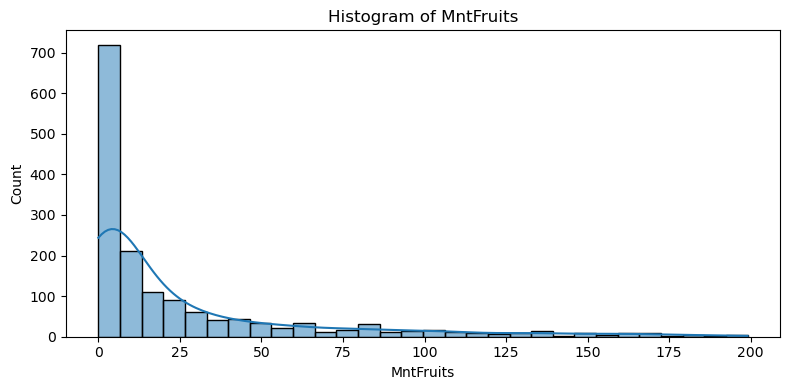

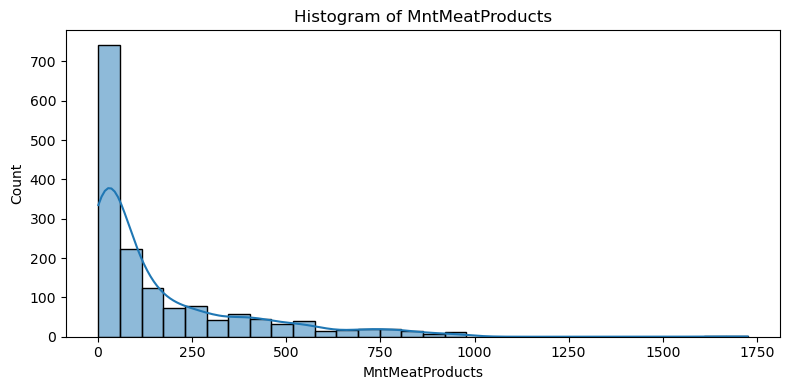

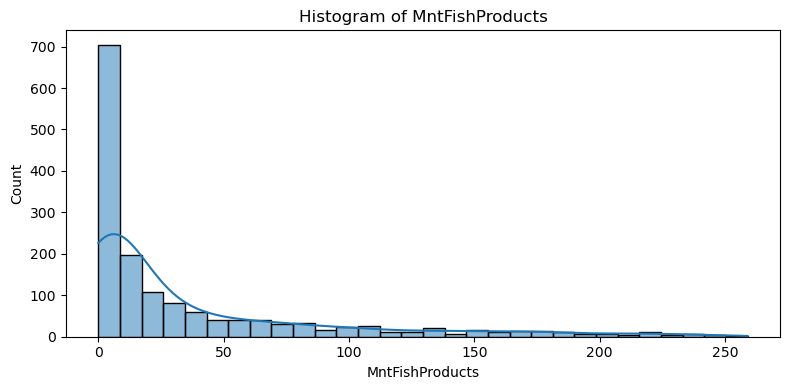

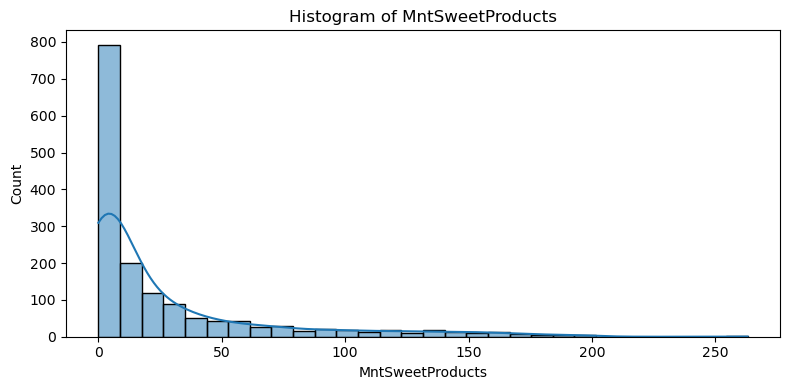

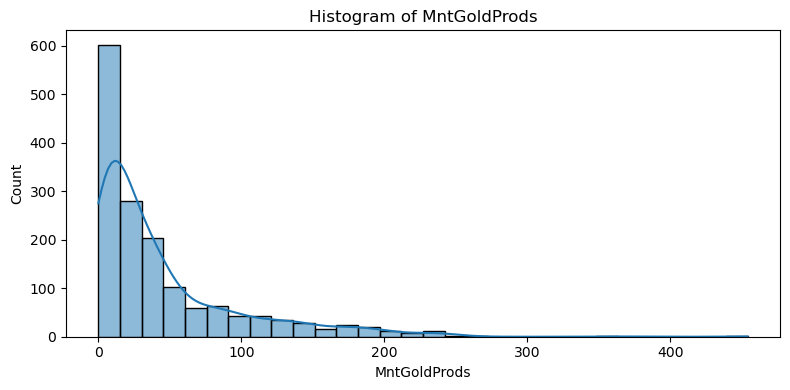

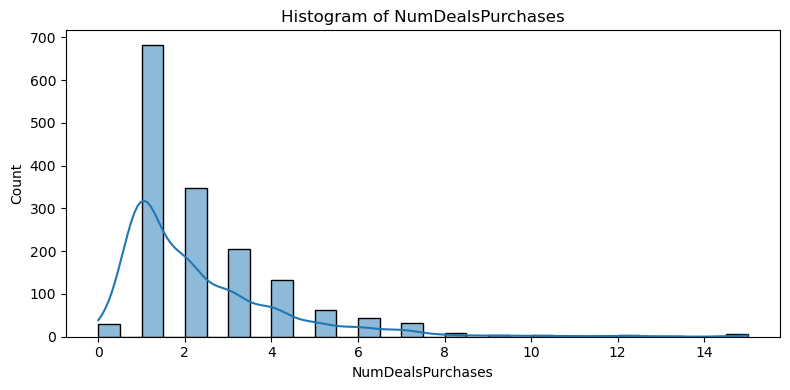

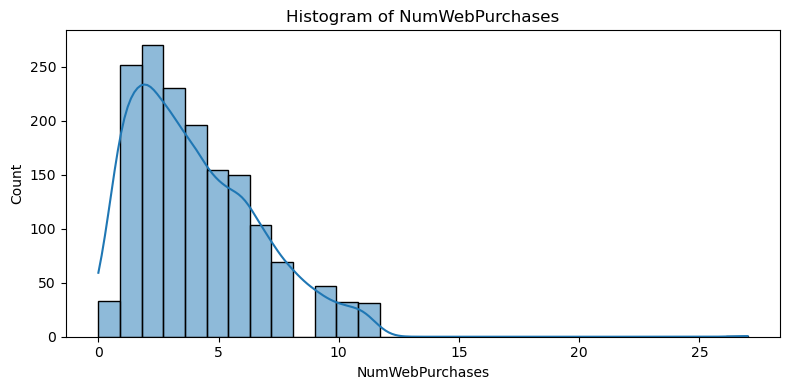

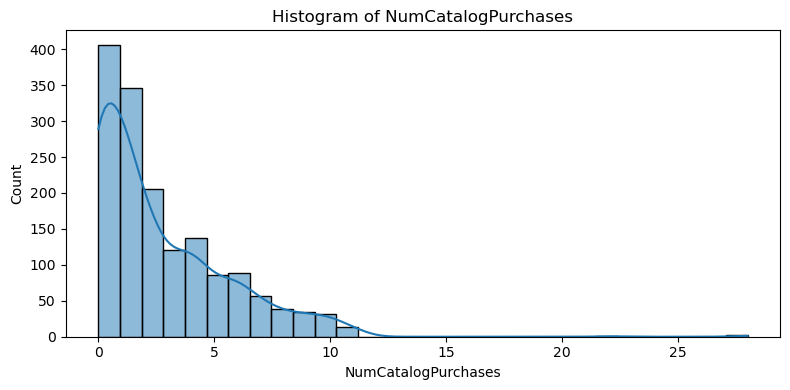

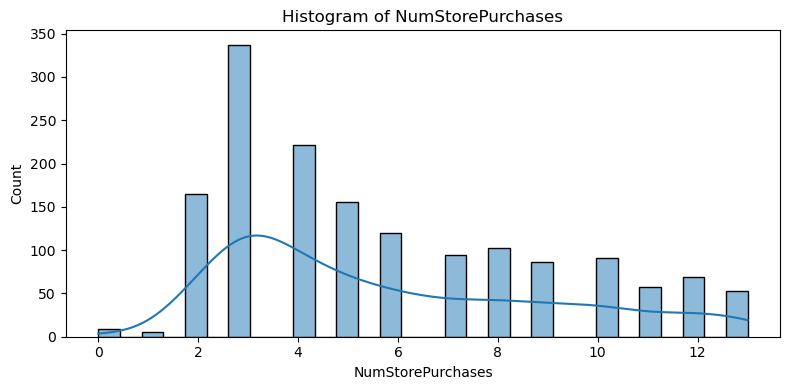

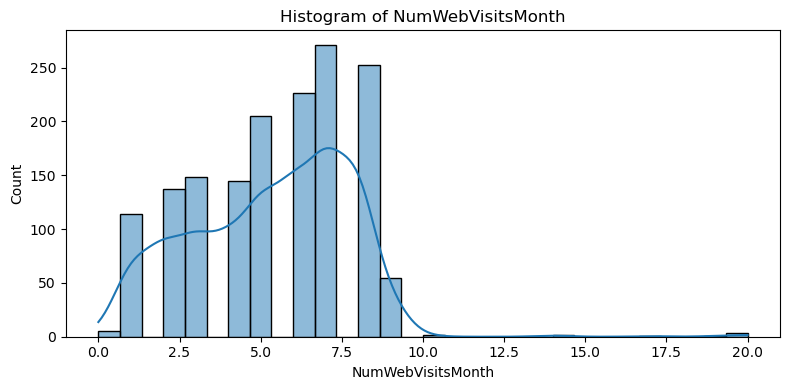

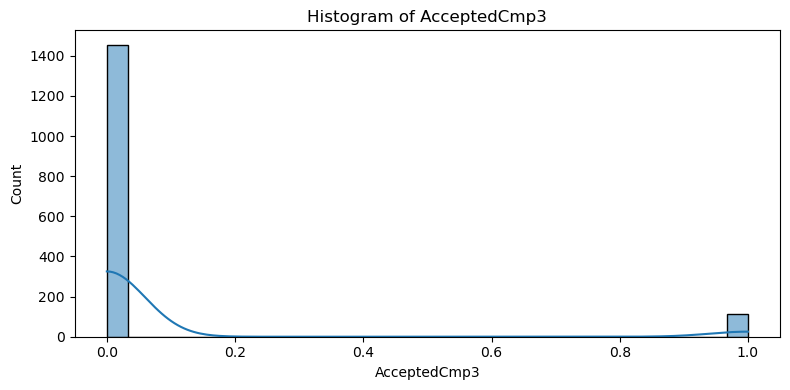

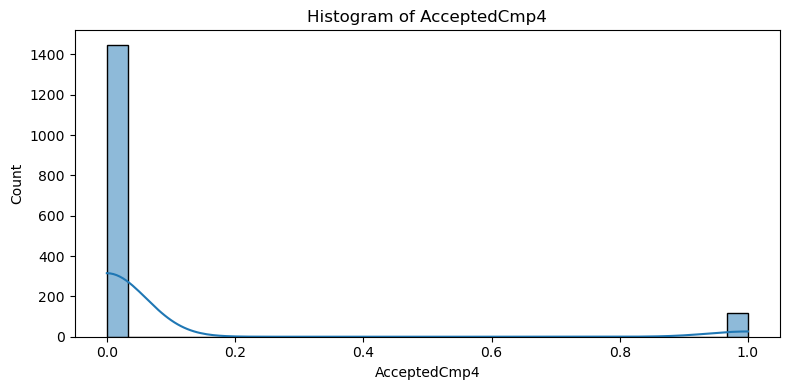

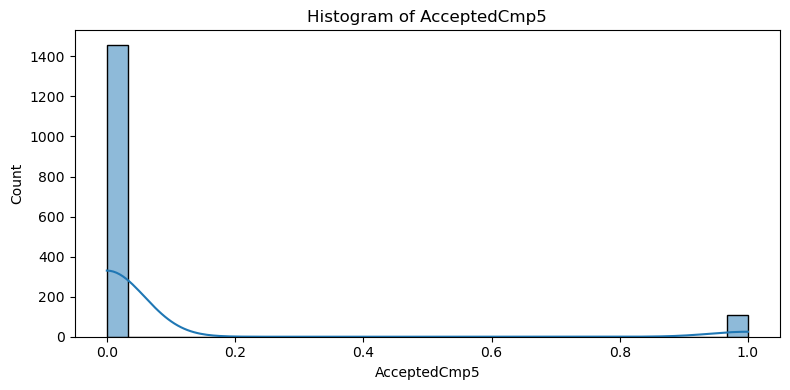

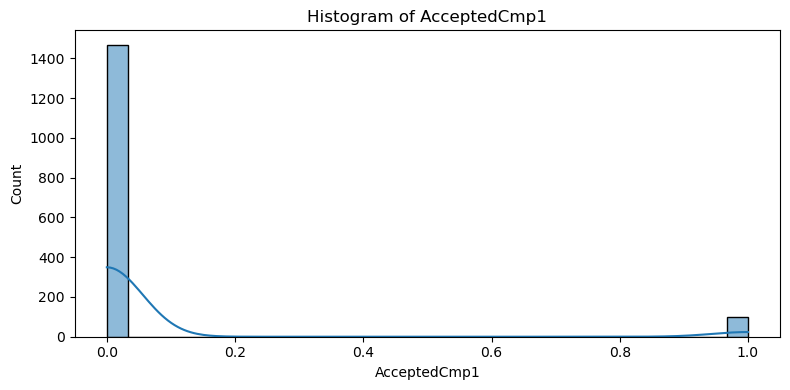

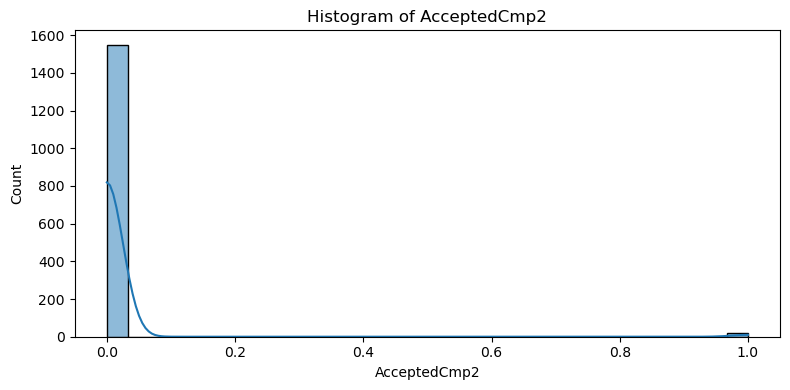

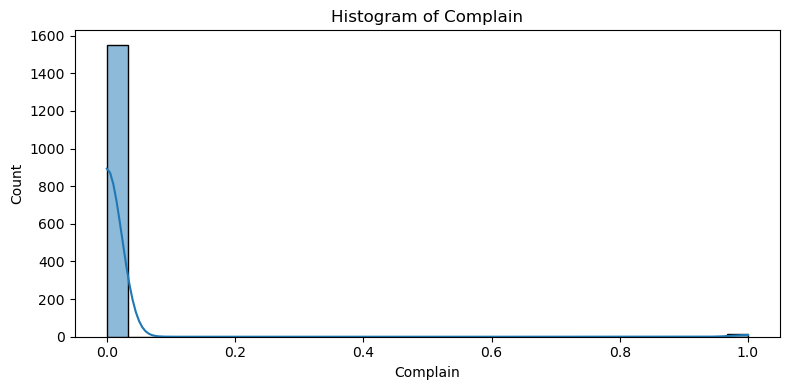

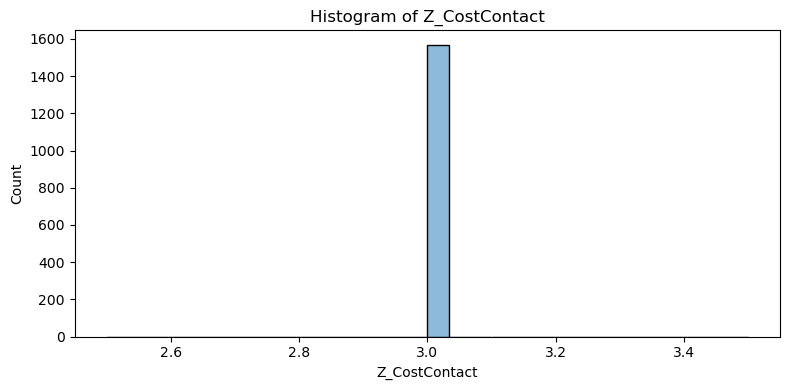

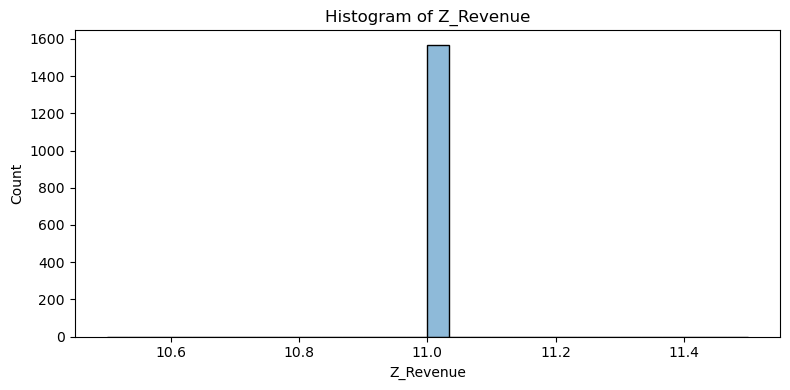

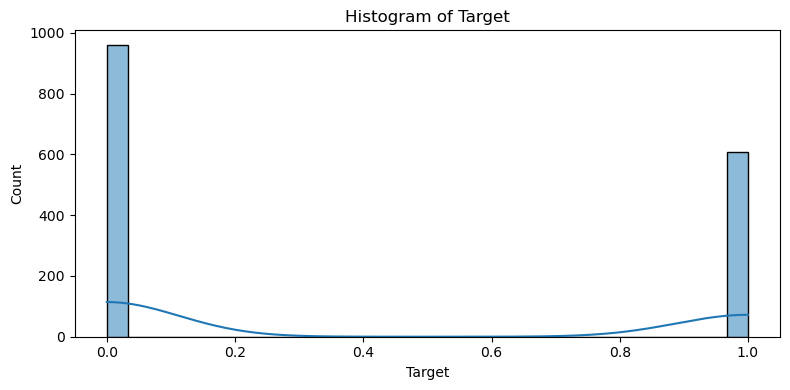

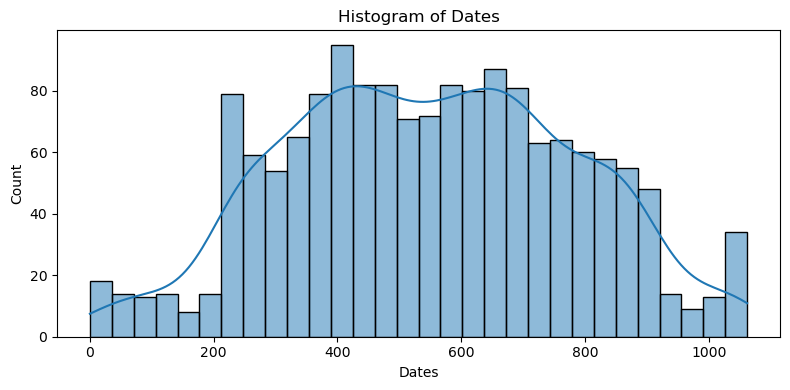

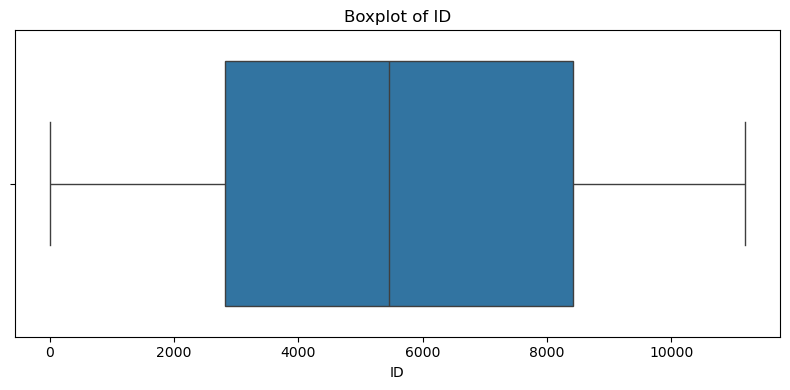

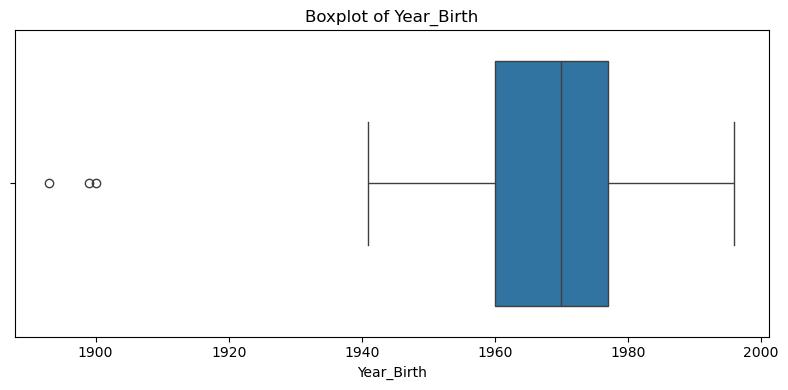

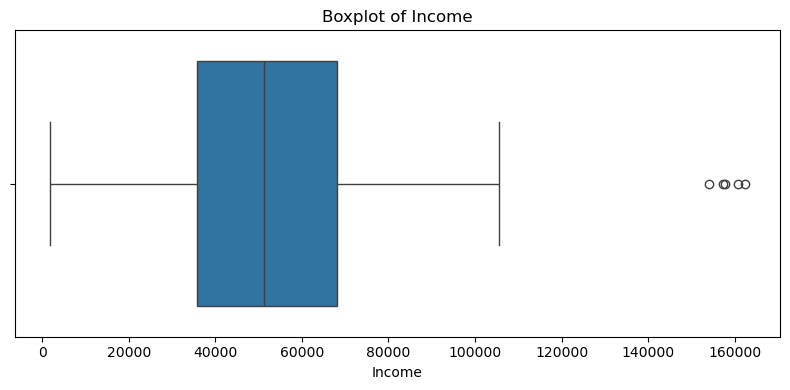

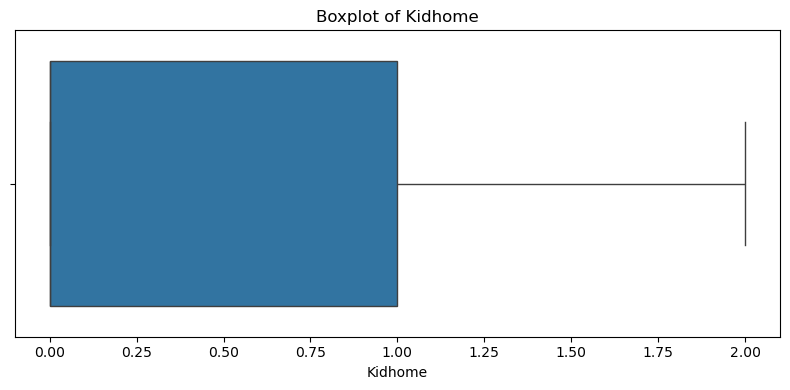

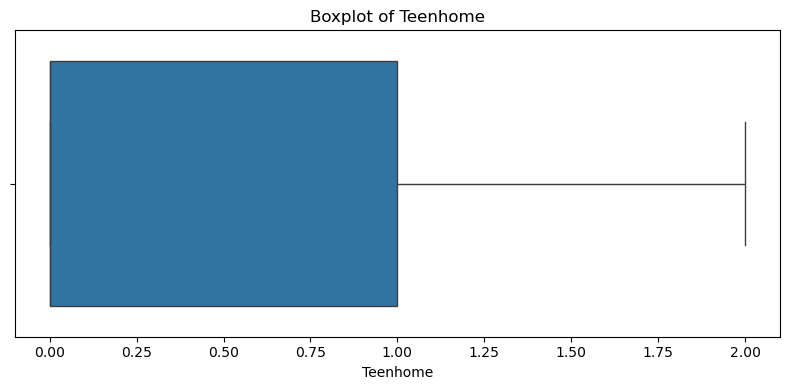

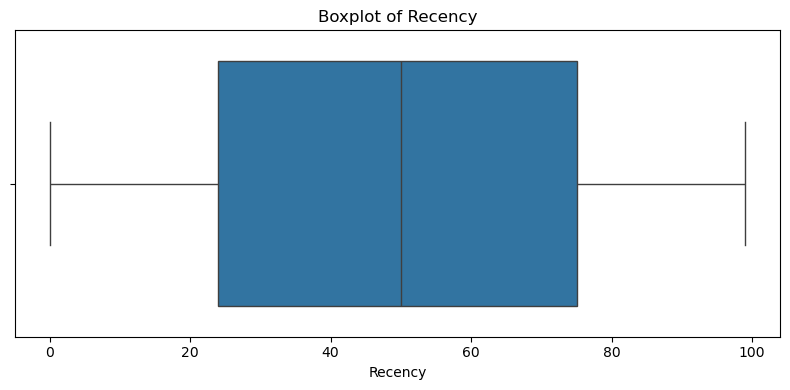

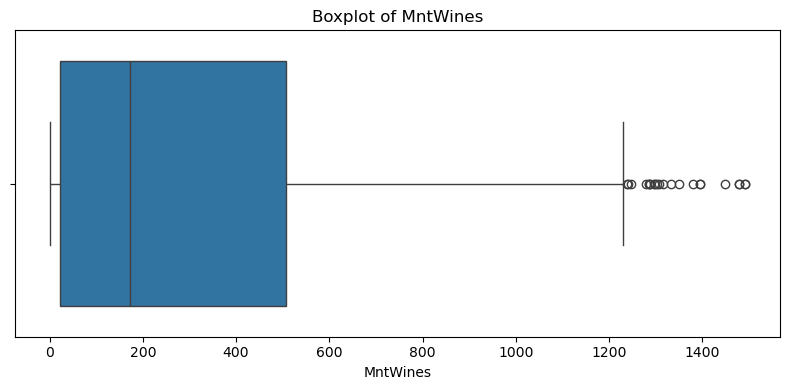

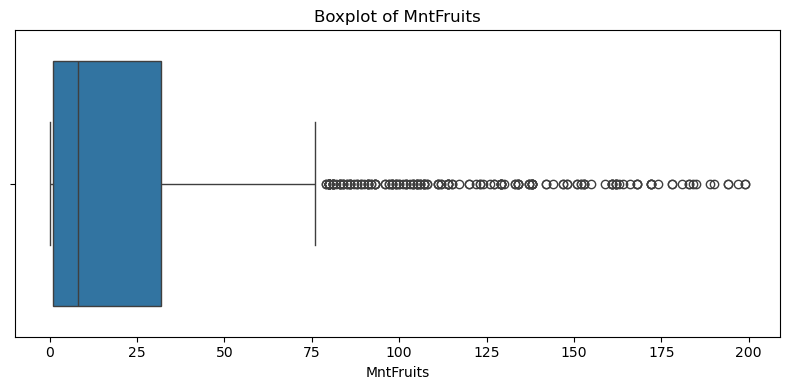

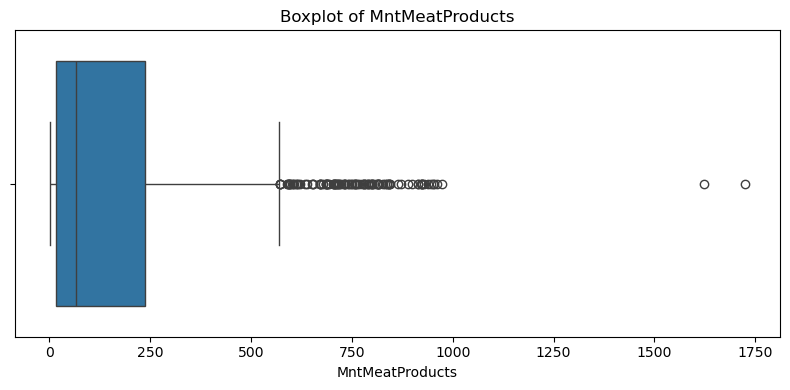

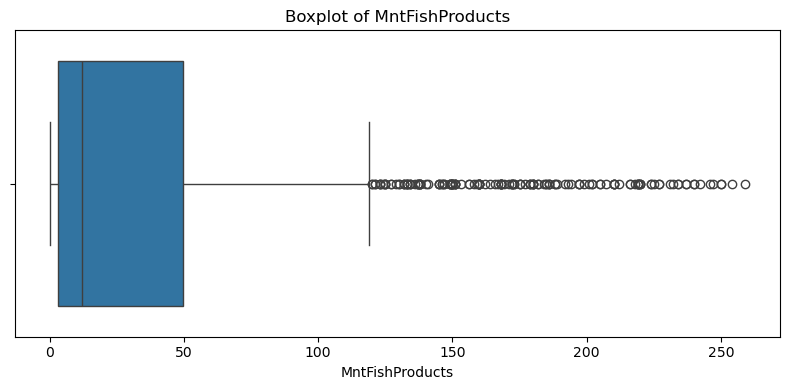

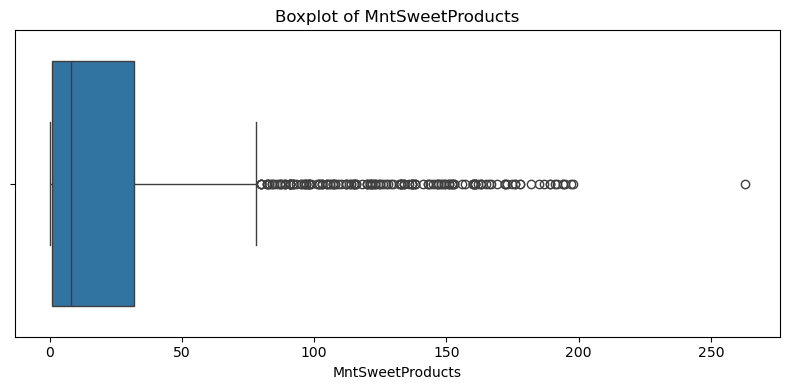

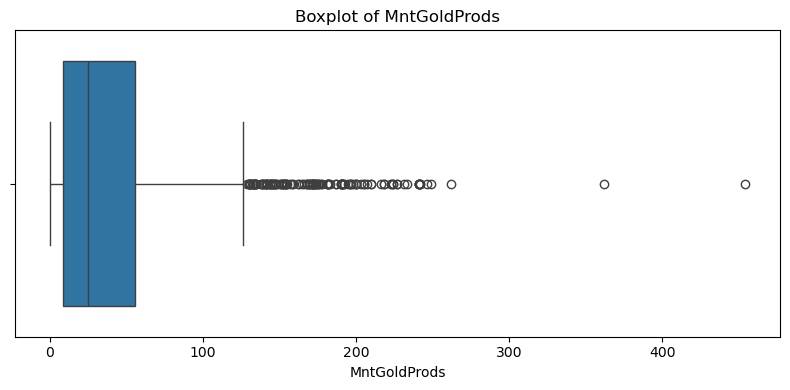

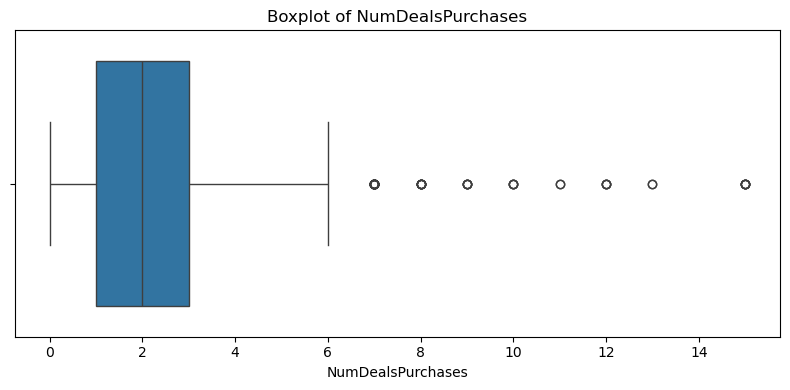

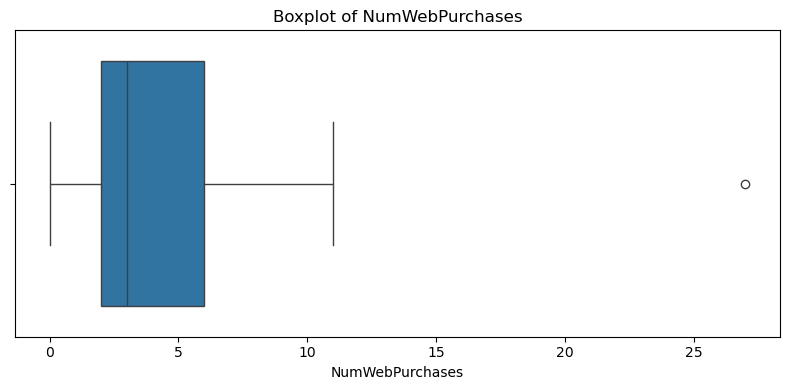

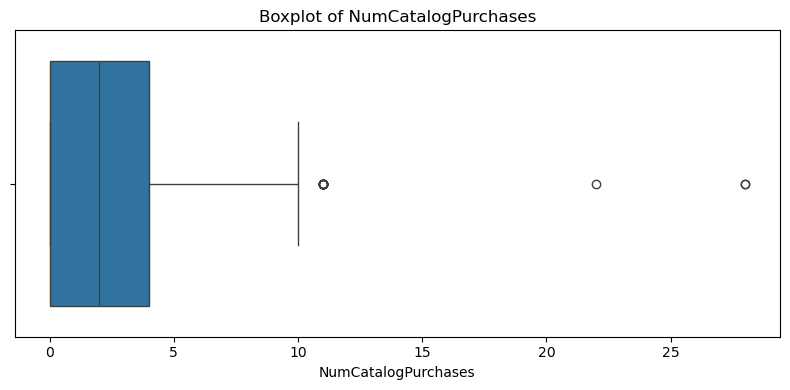

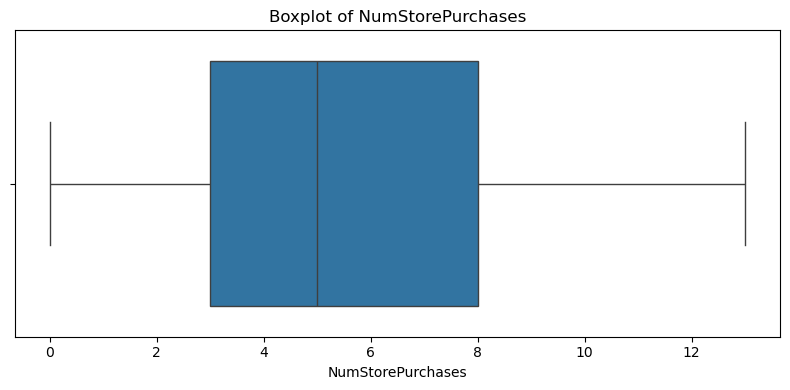

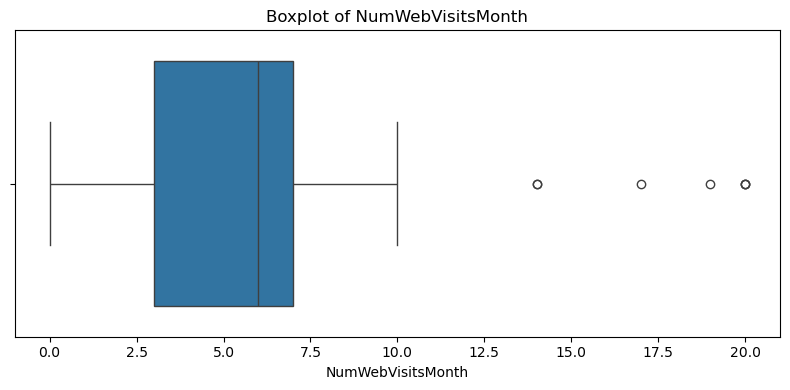

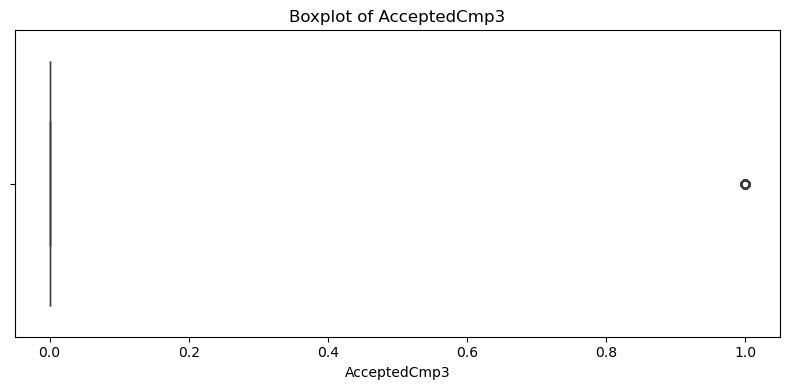

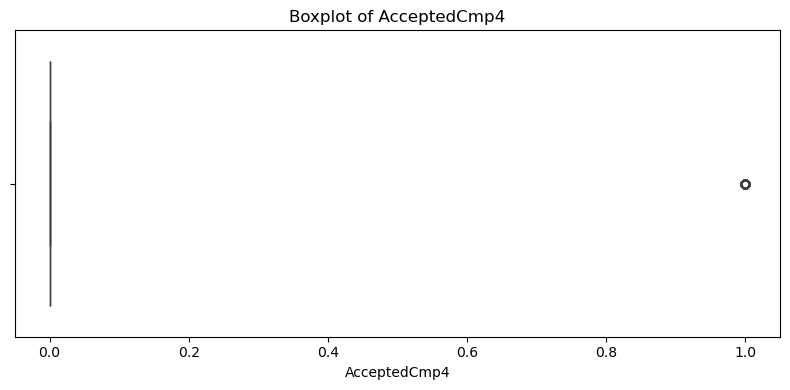

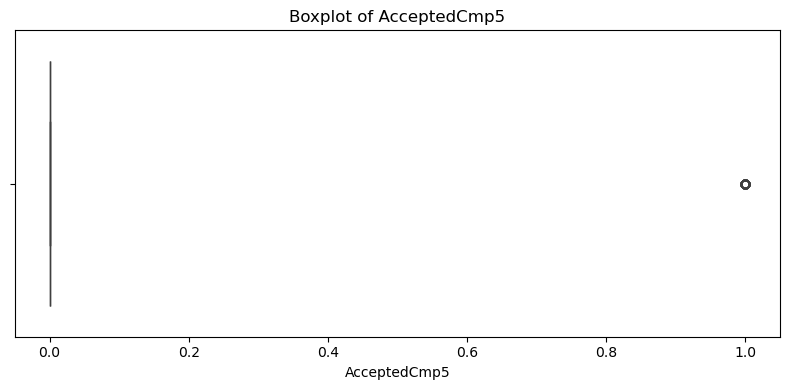

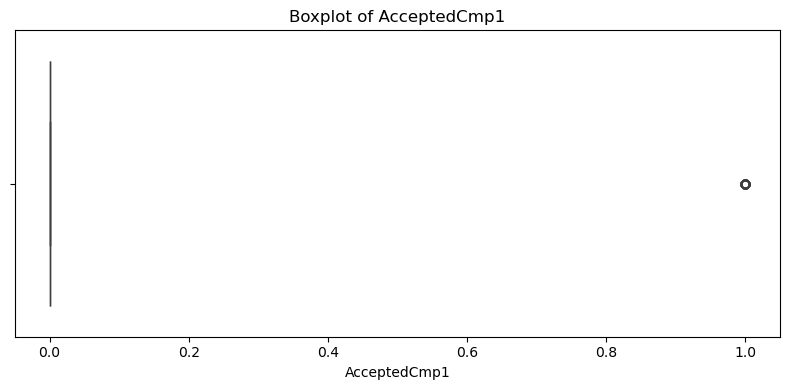

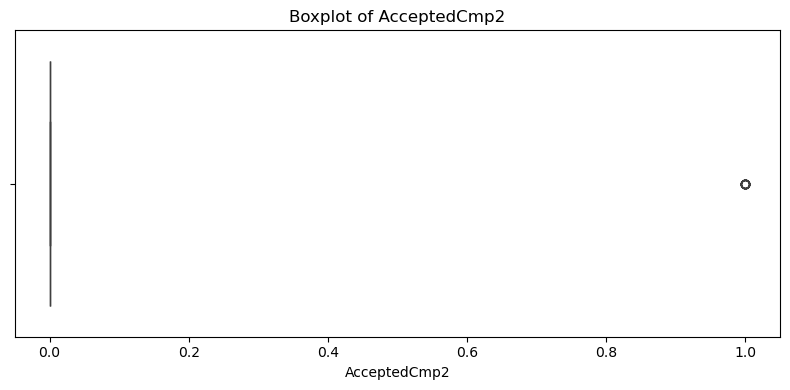

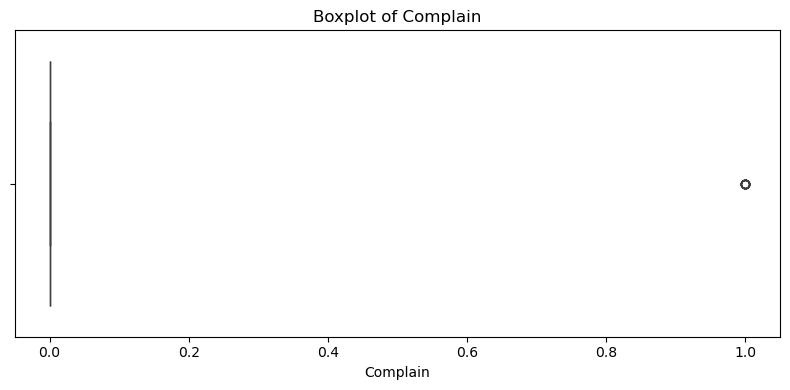

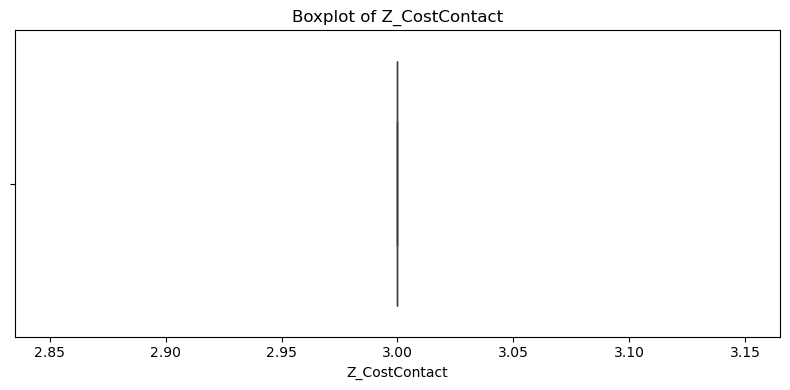

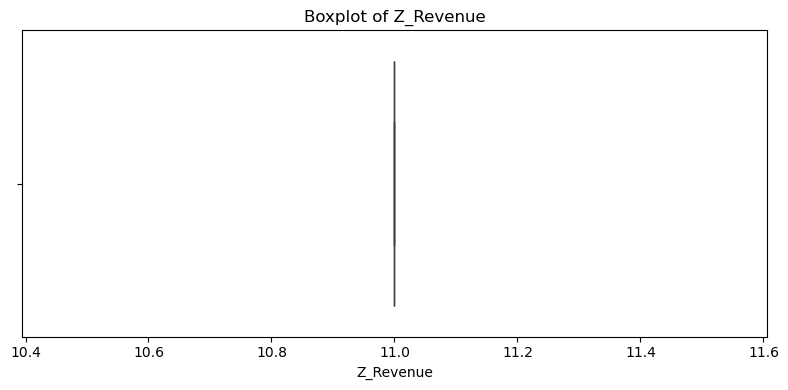

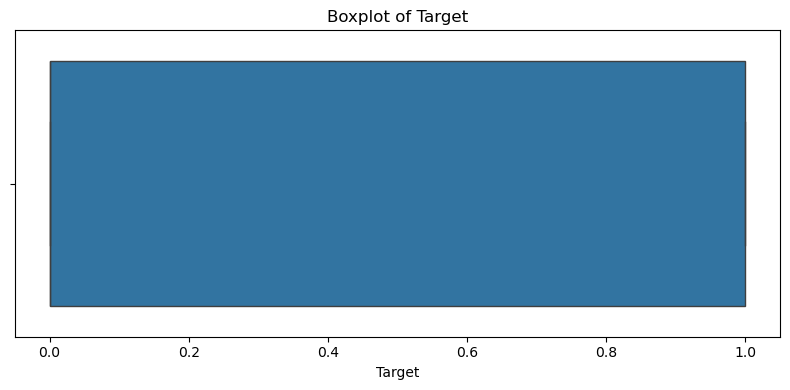

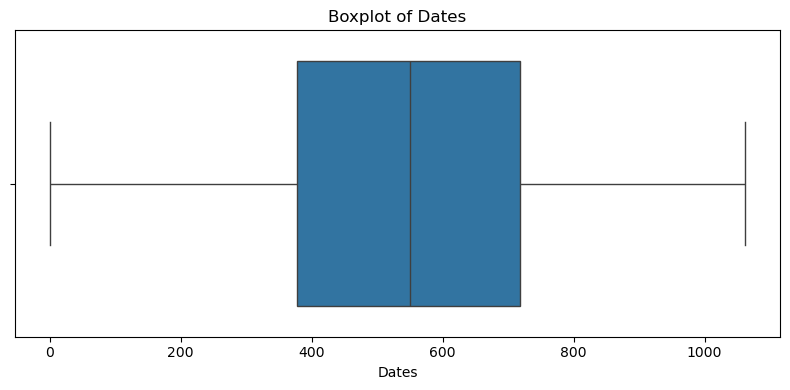

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

# Boxplots (to check distribution and outliers)
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


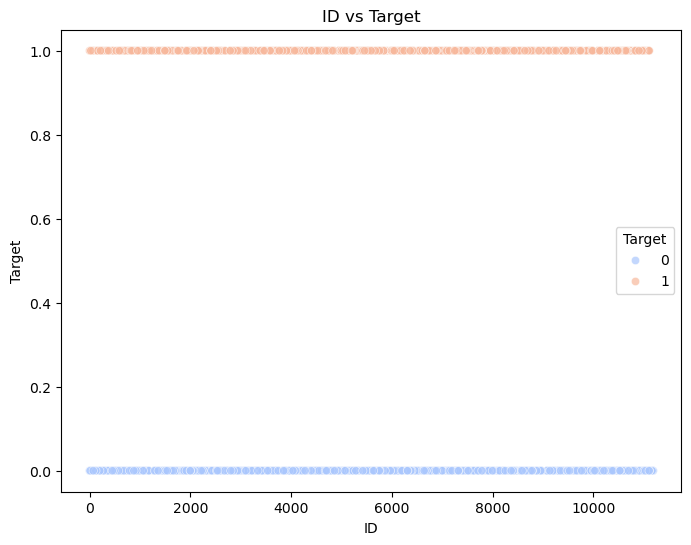

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


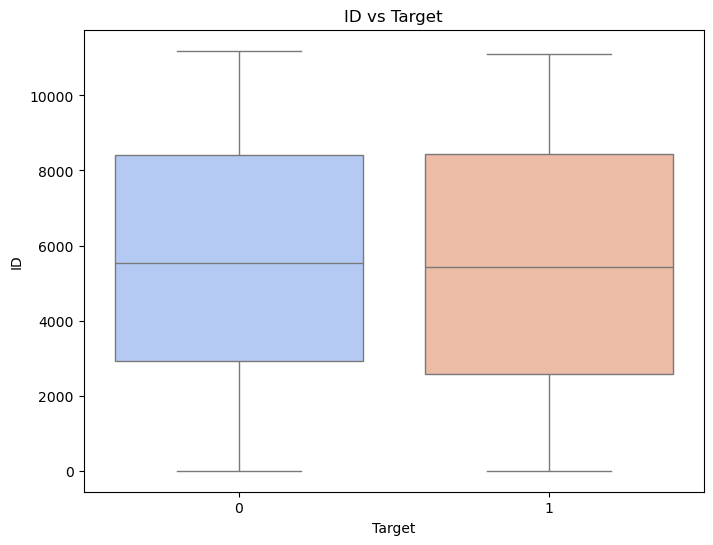

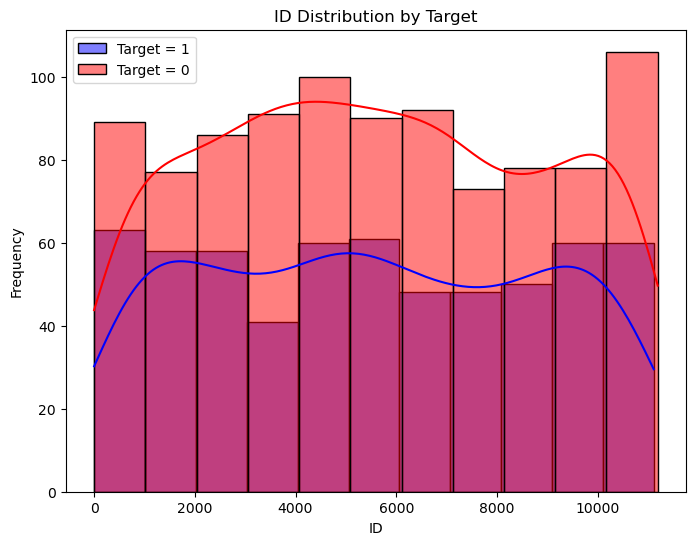

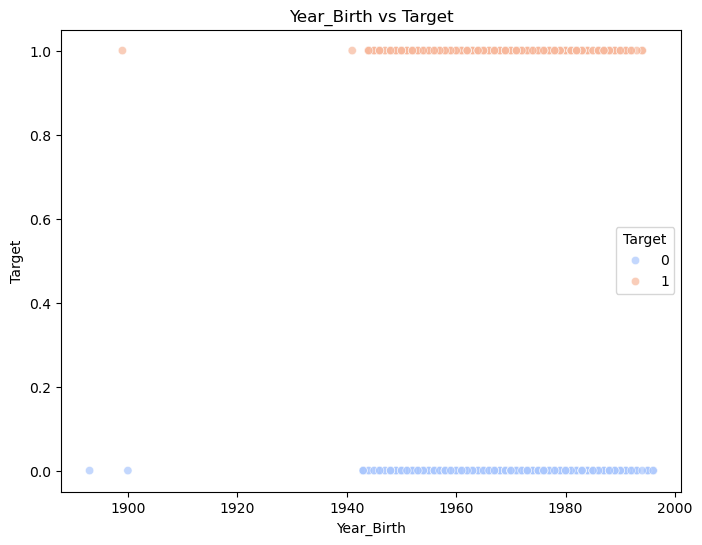

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


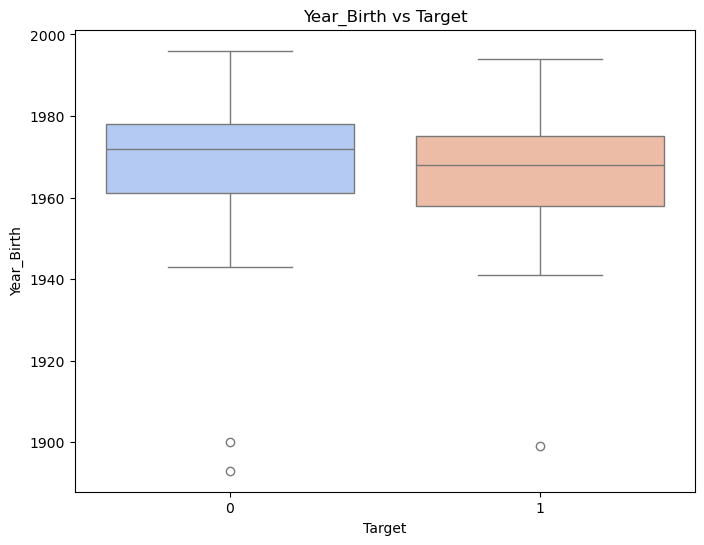

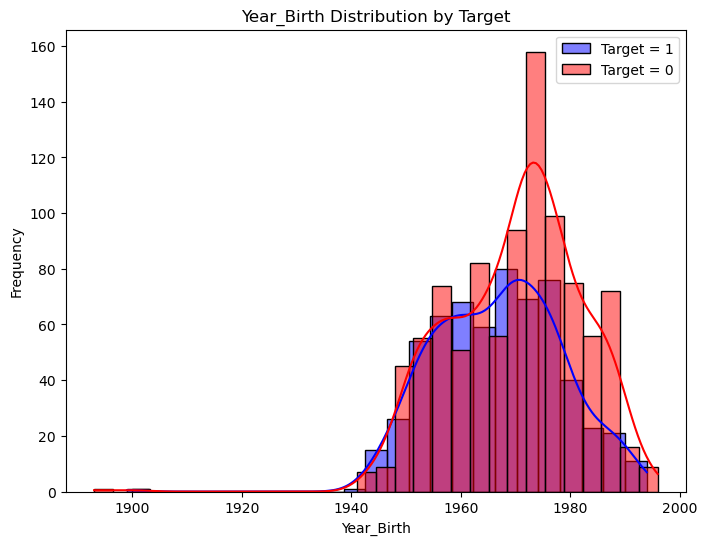

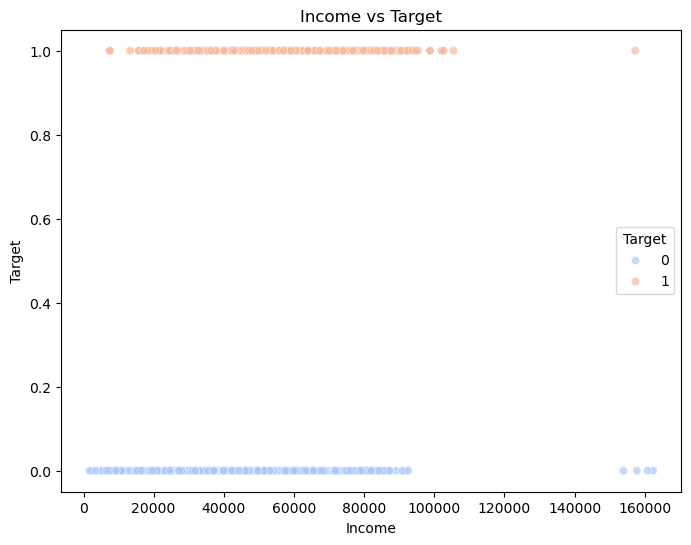

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


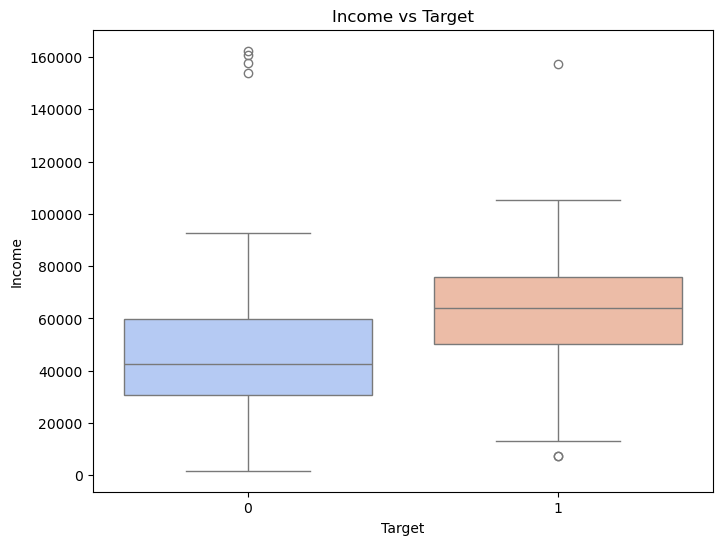

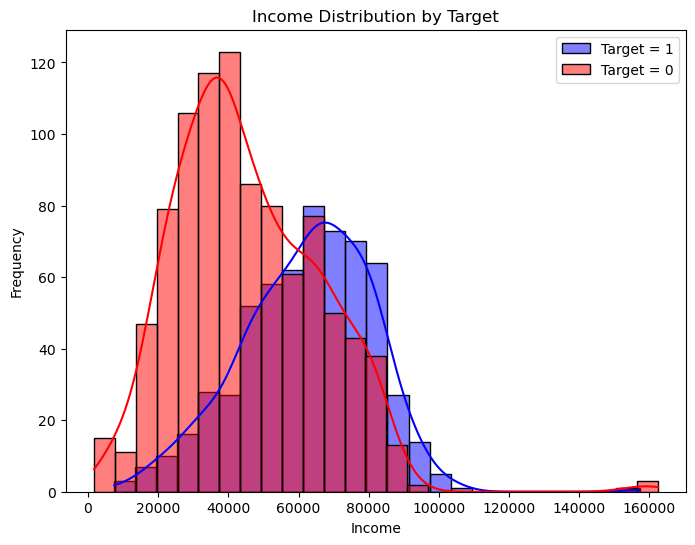

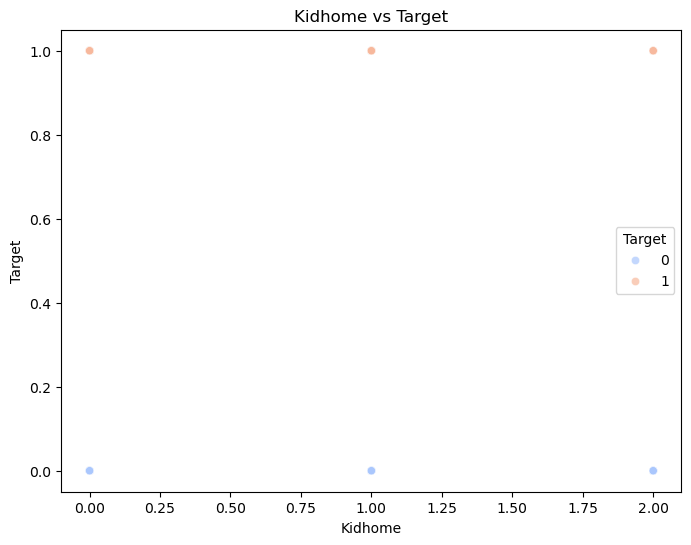

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


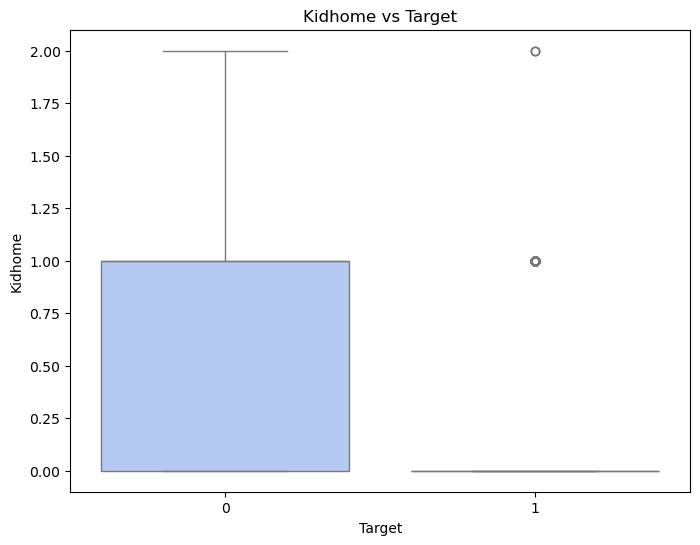

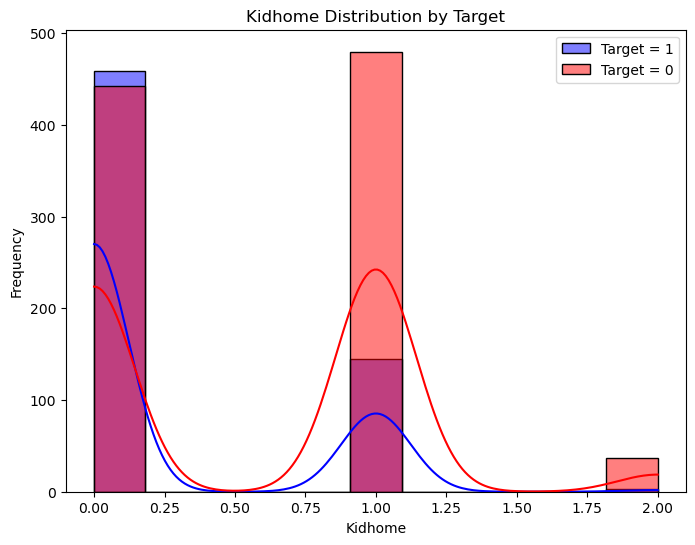

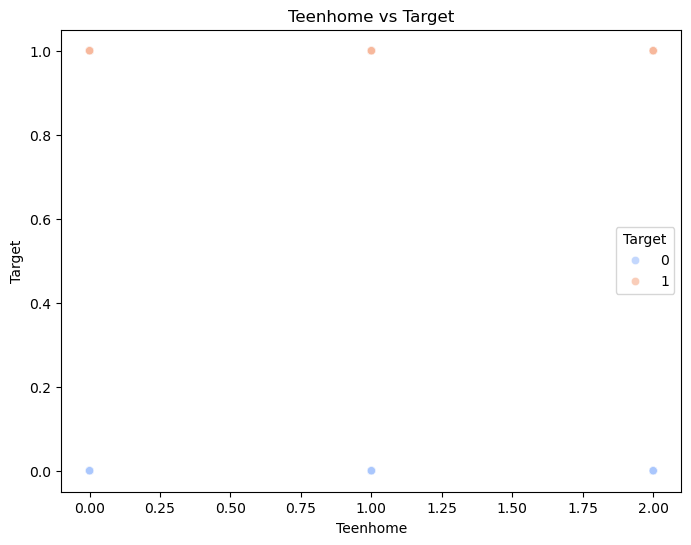

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


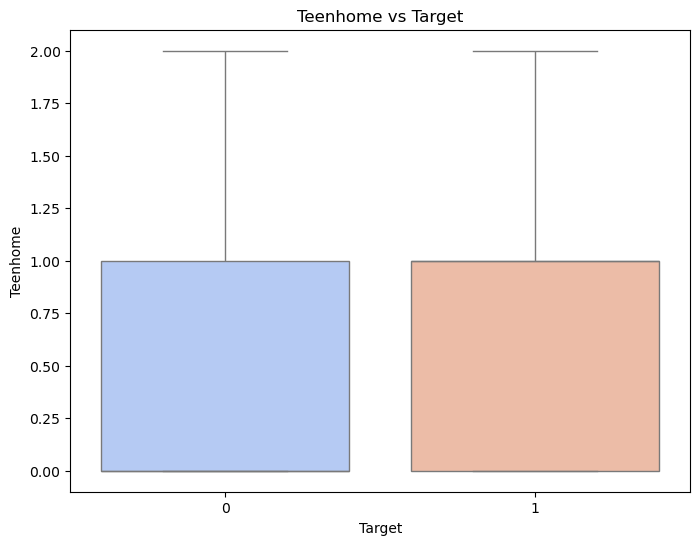

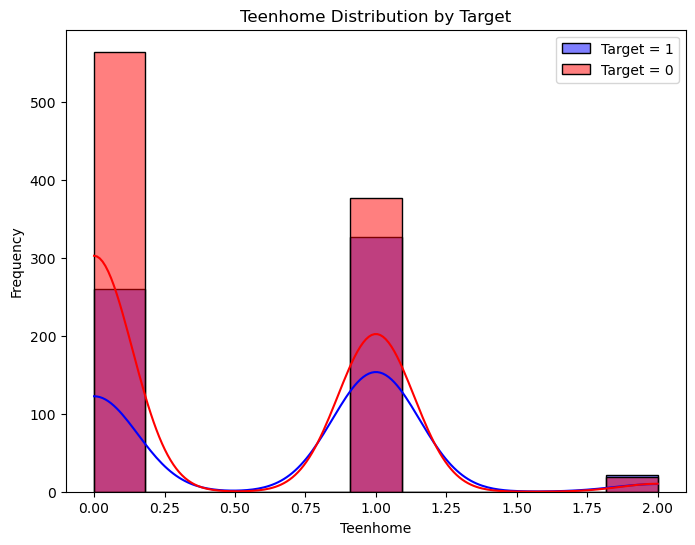

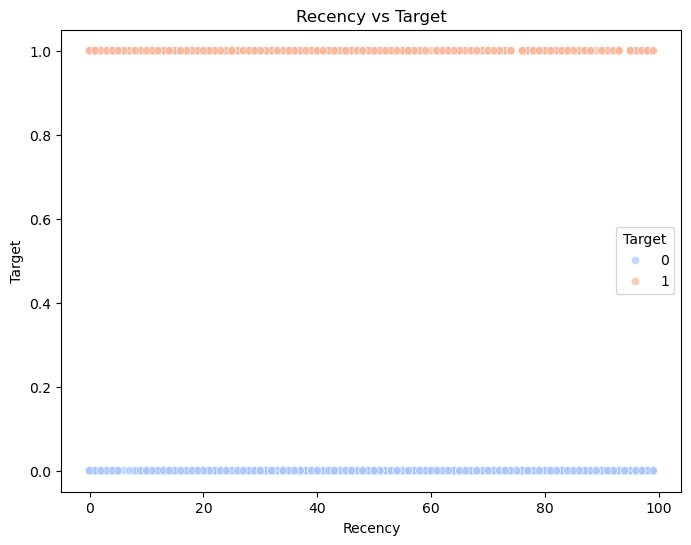

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


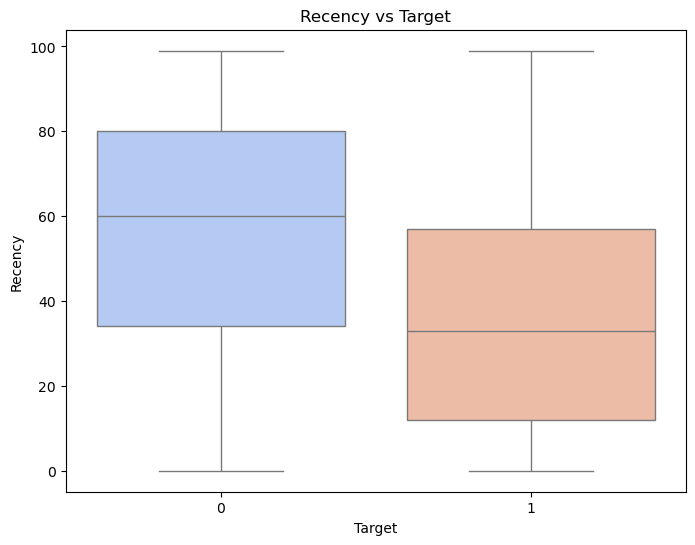

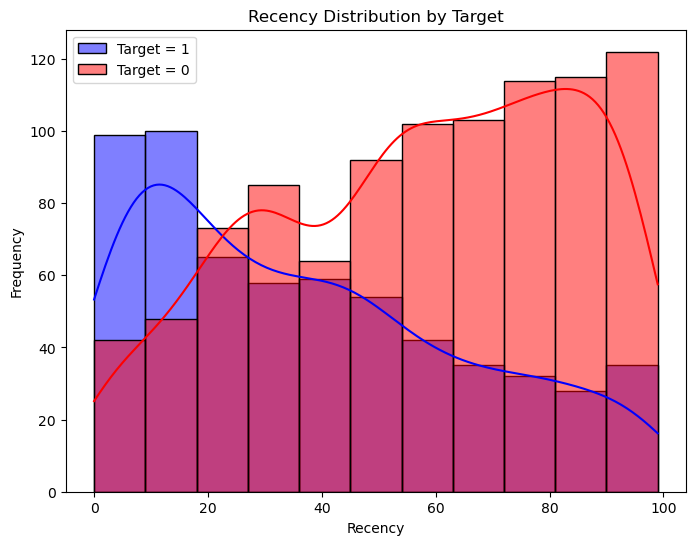

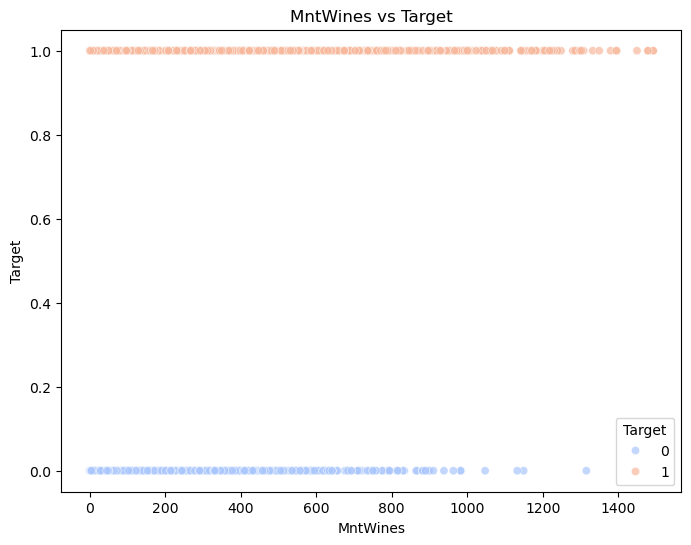

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


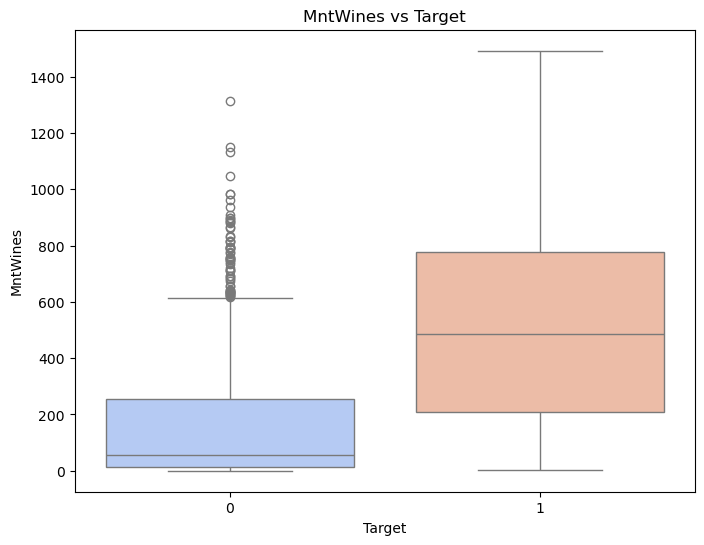

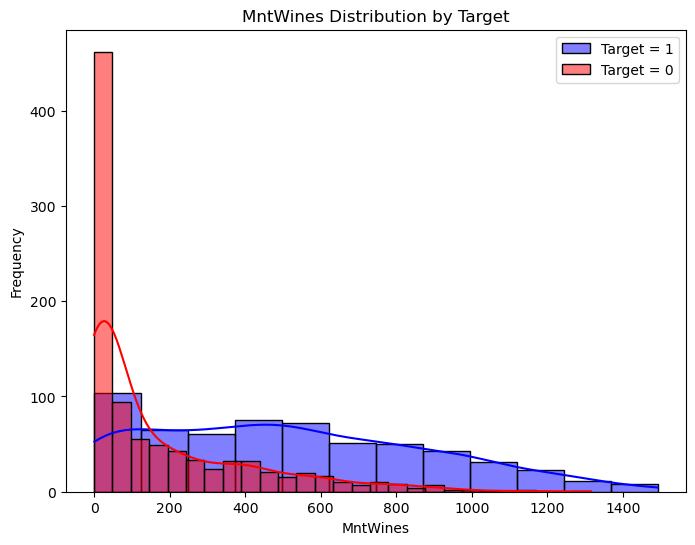

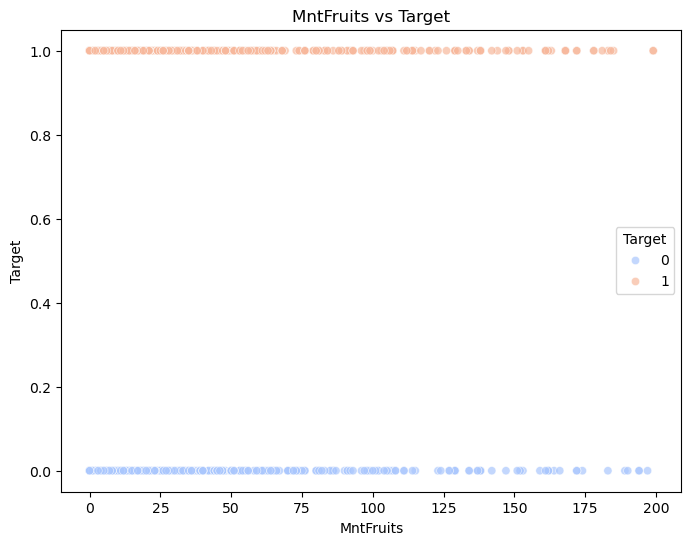

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


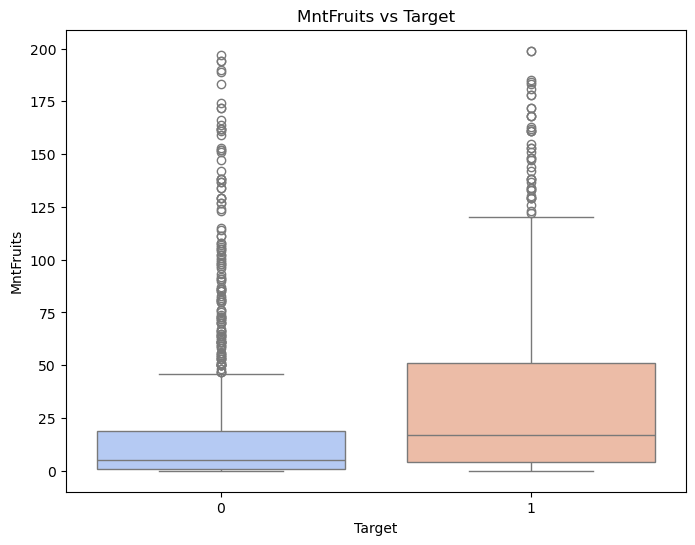

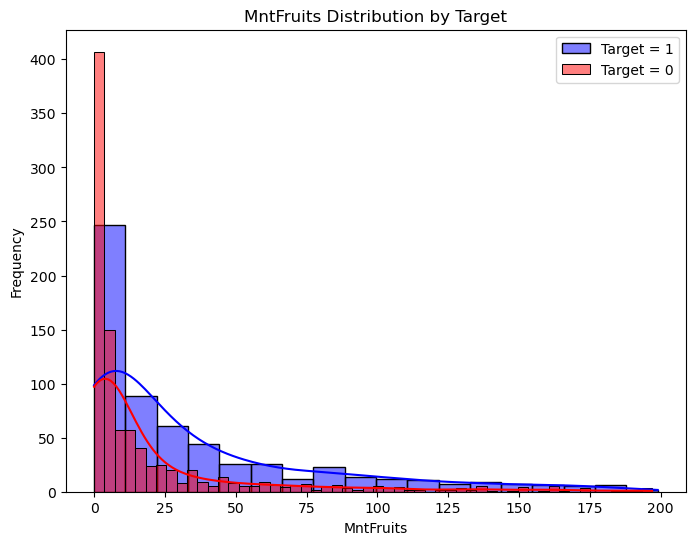

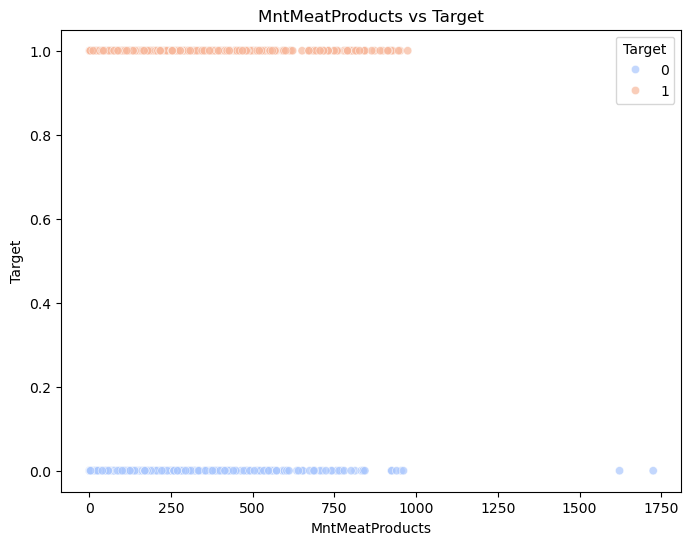

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


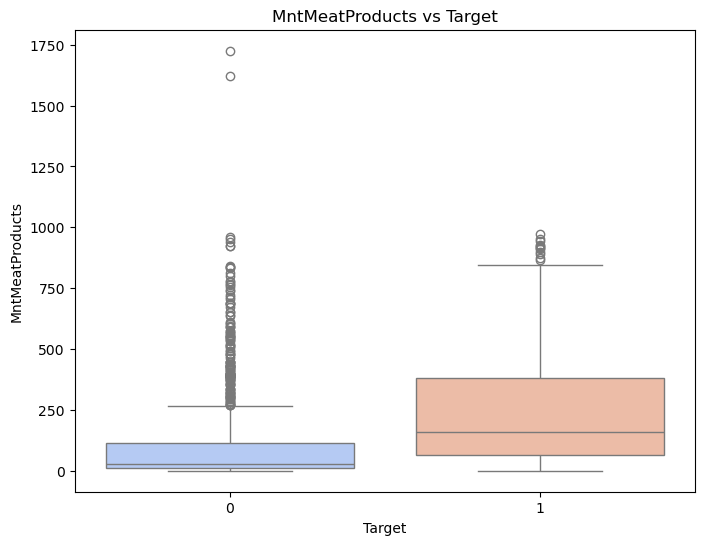

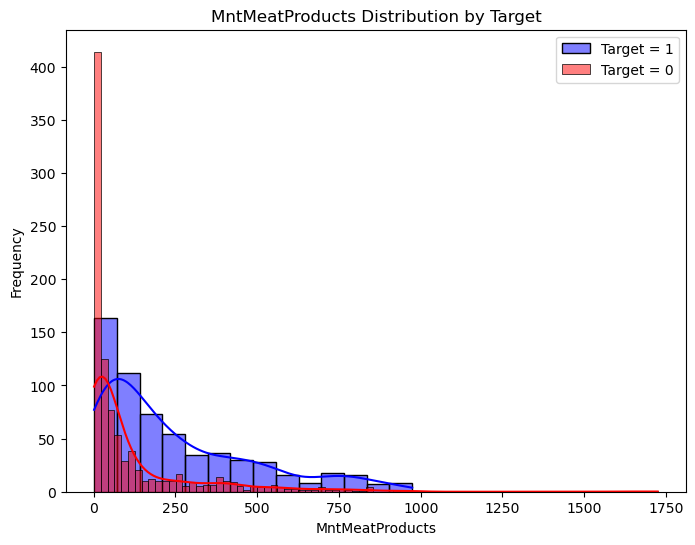

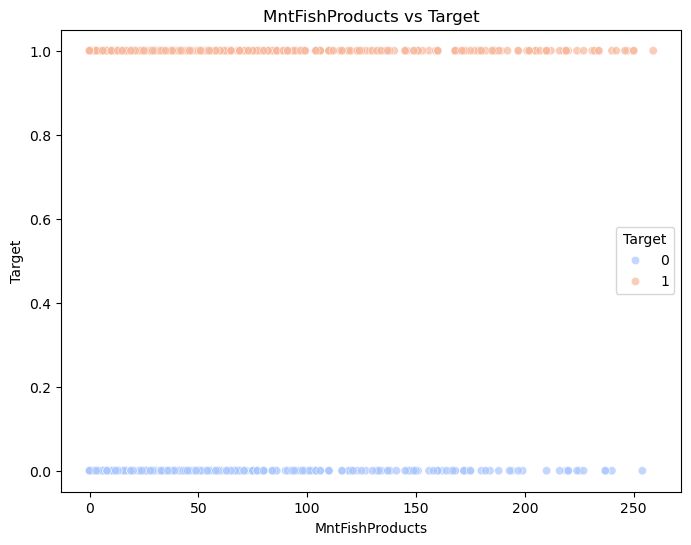

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


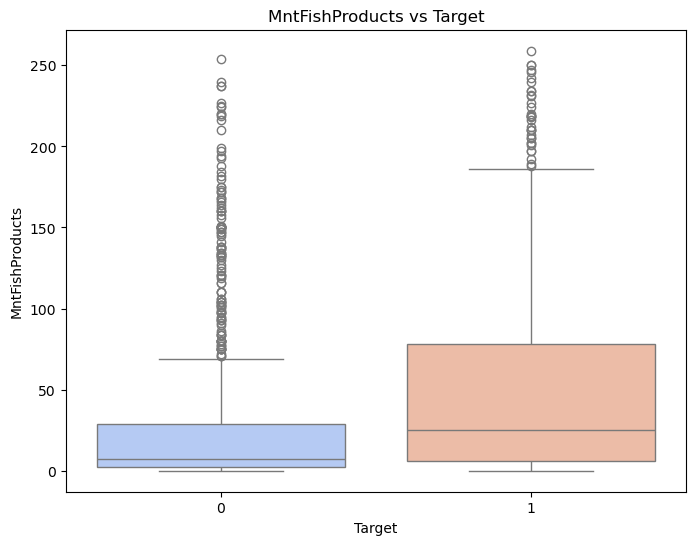

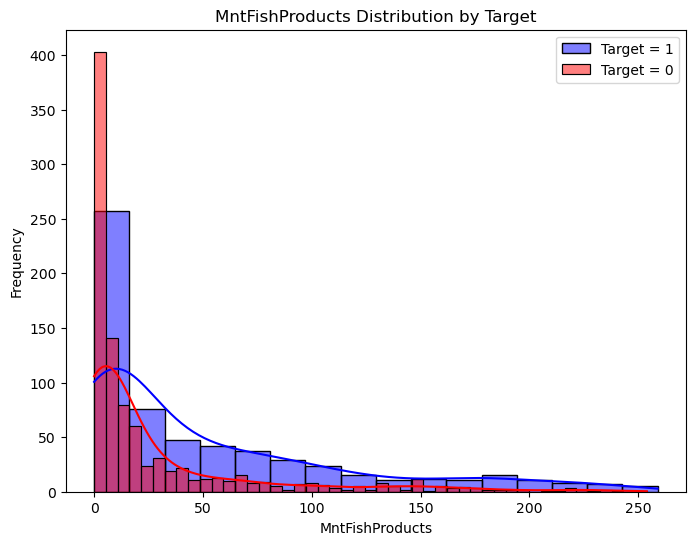

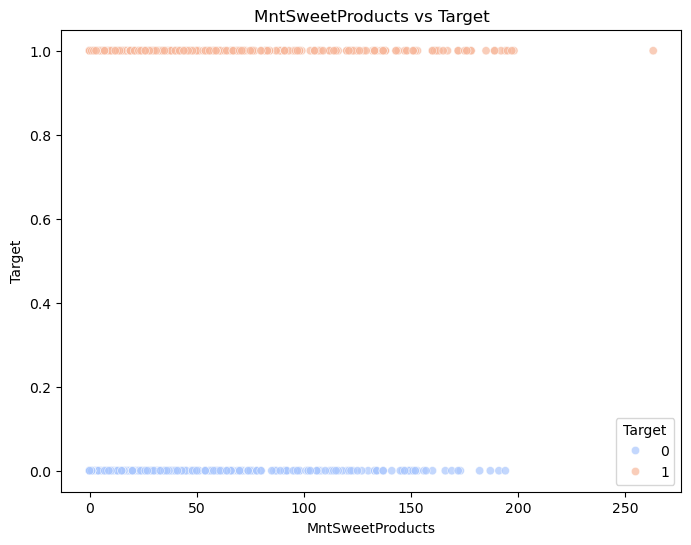

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


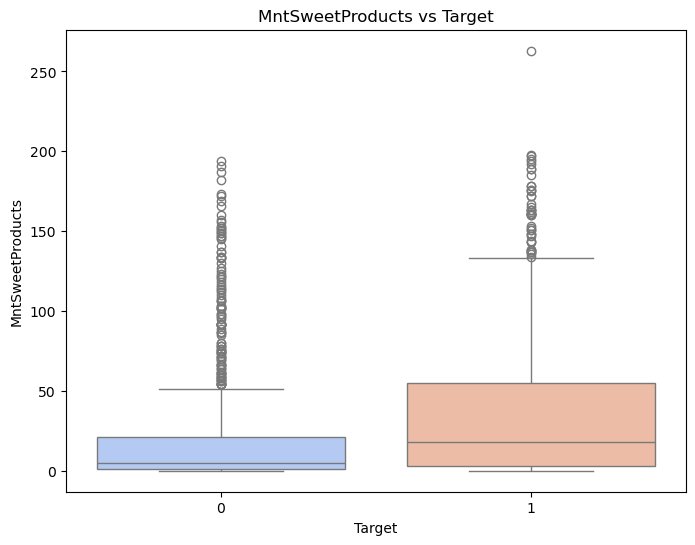

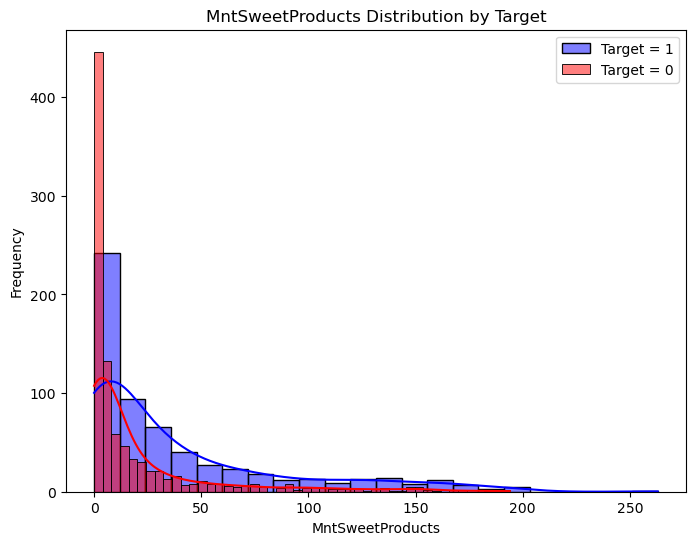

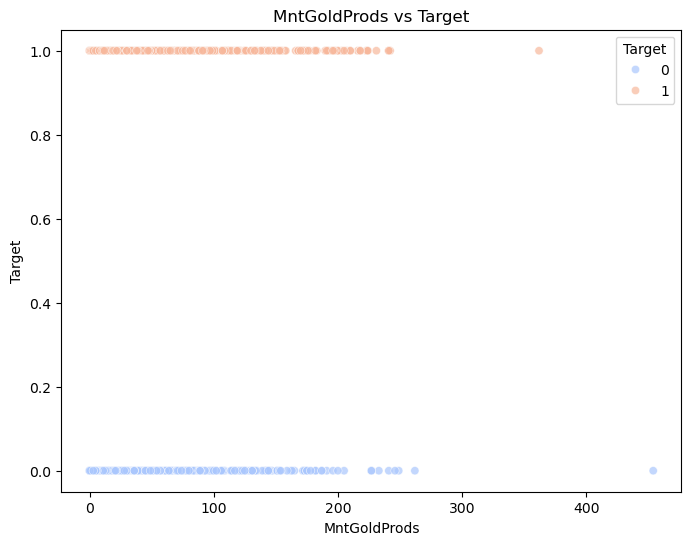

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


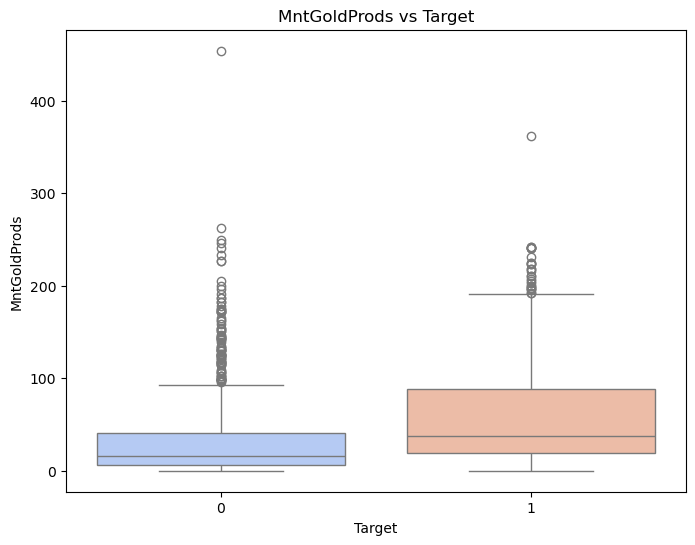

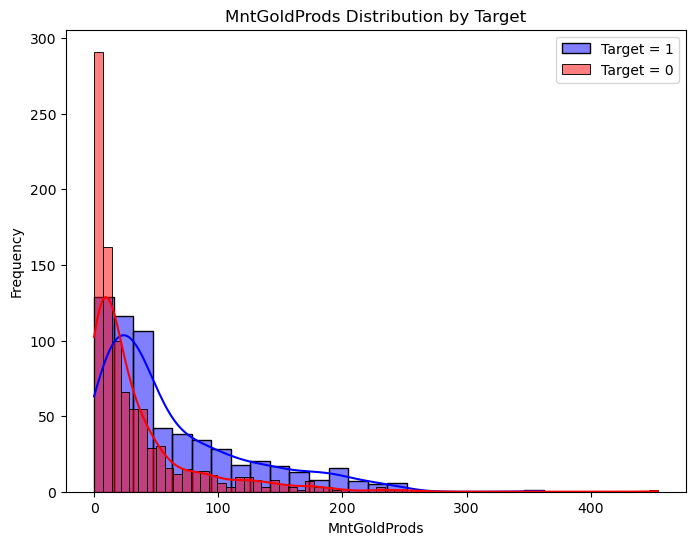

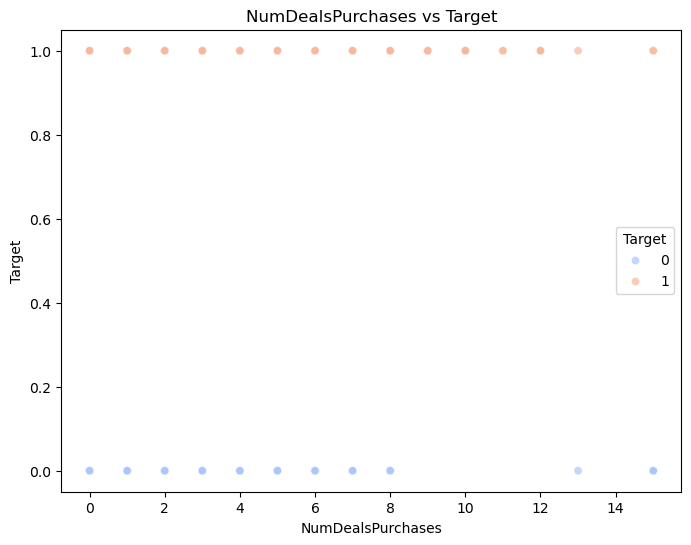

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


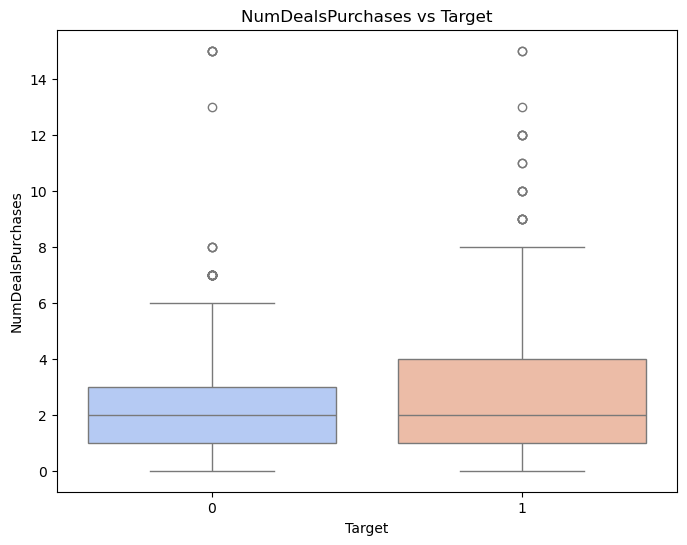

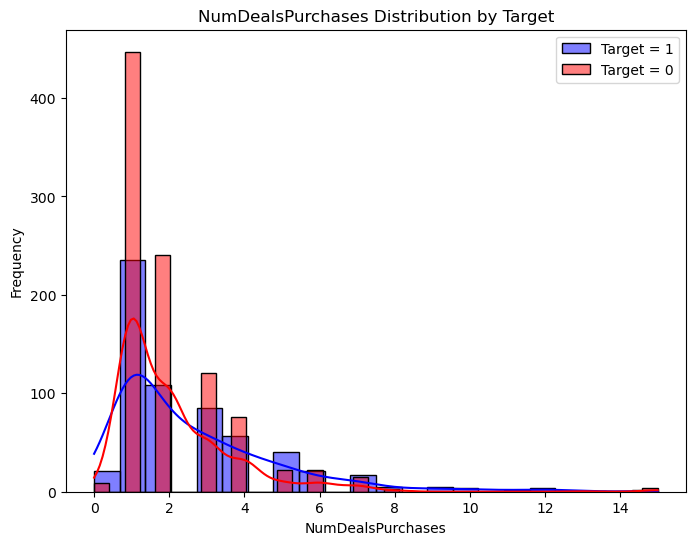

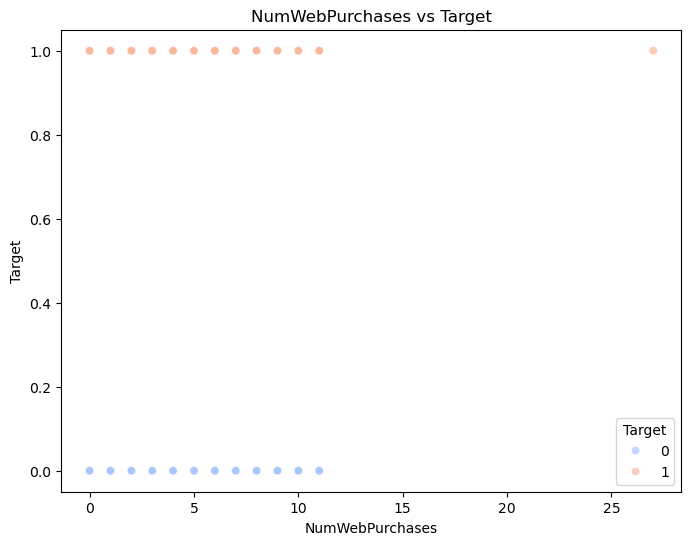

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


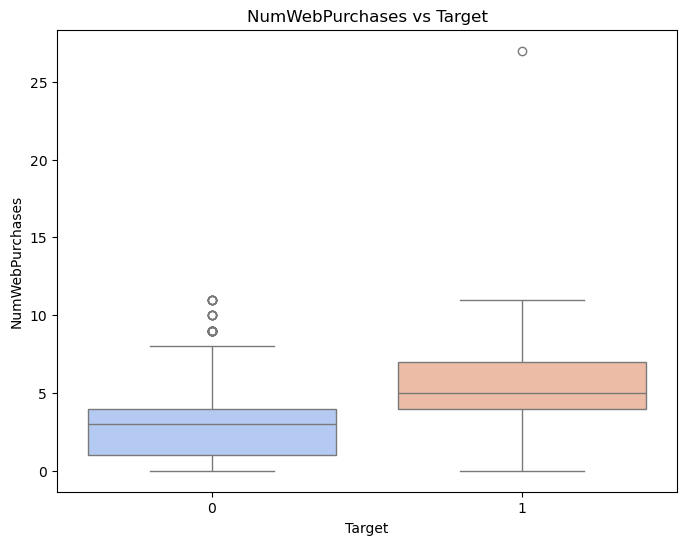

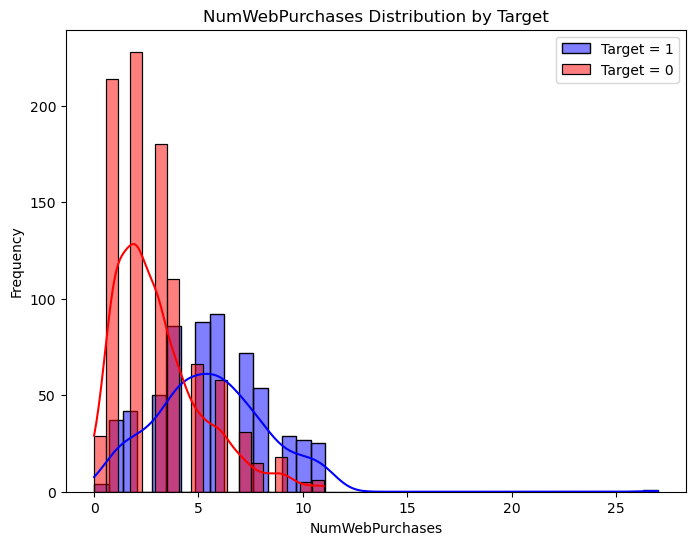

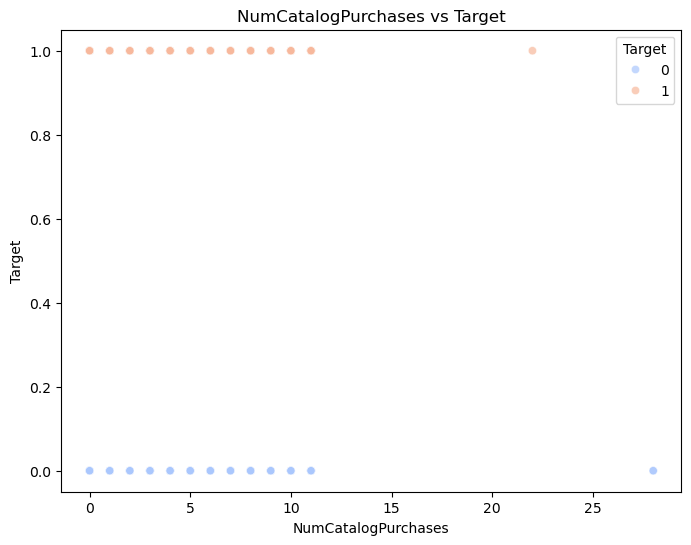

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


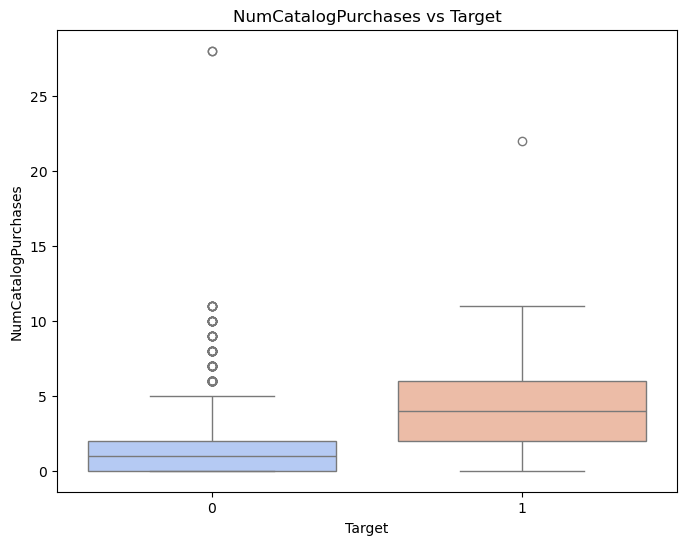

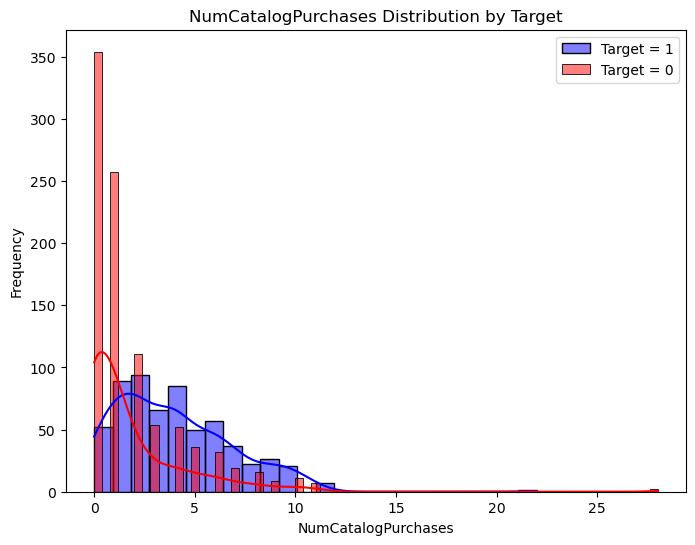

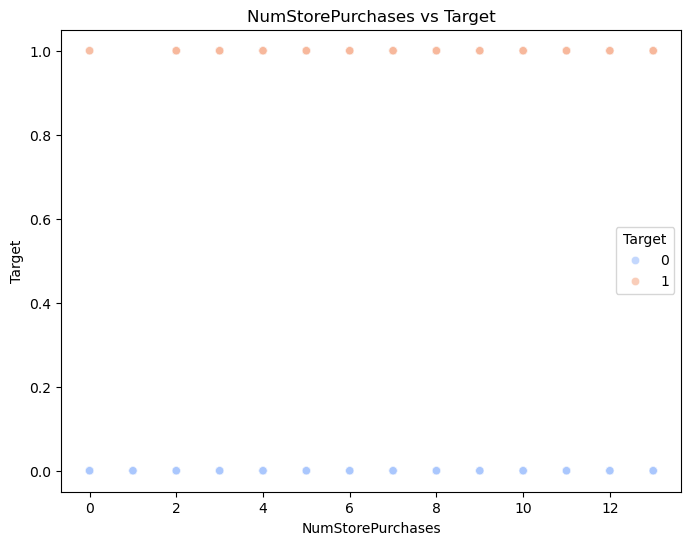

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


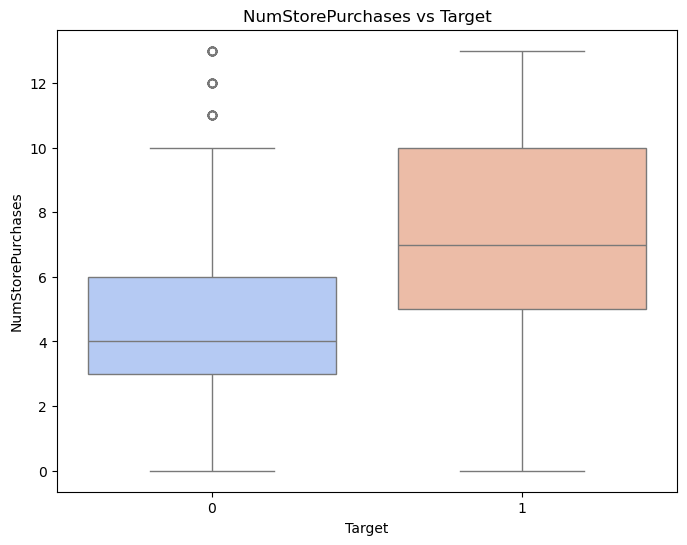

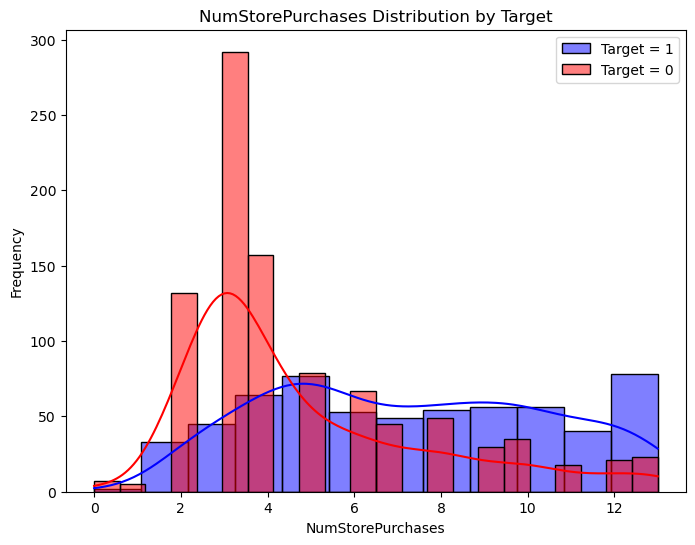

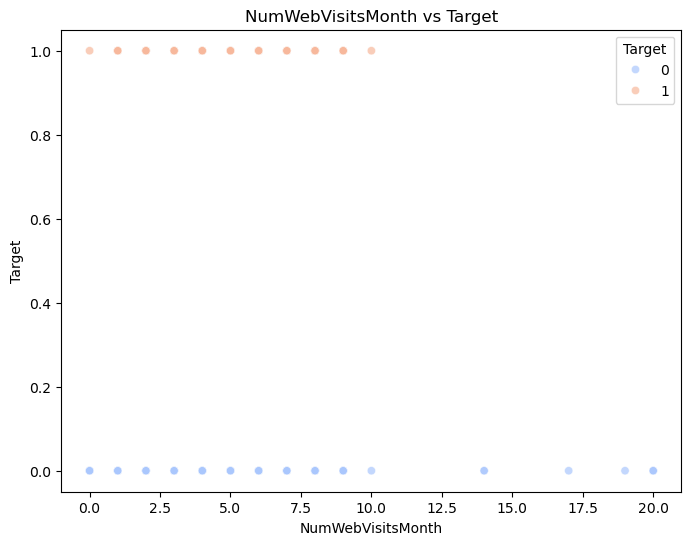

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


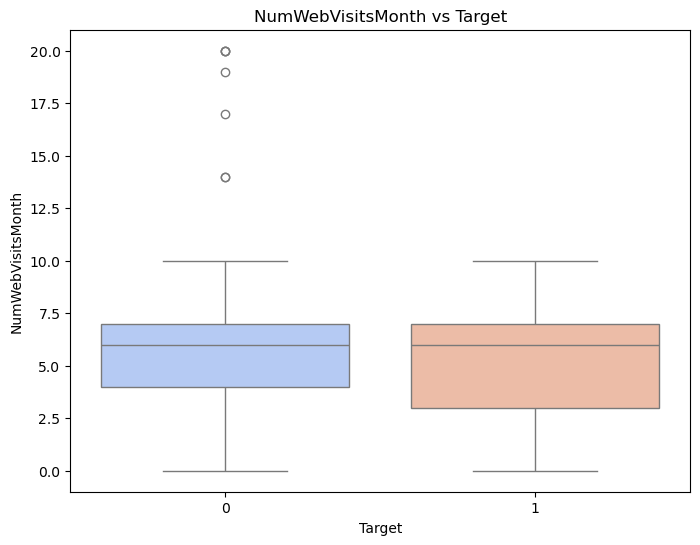

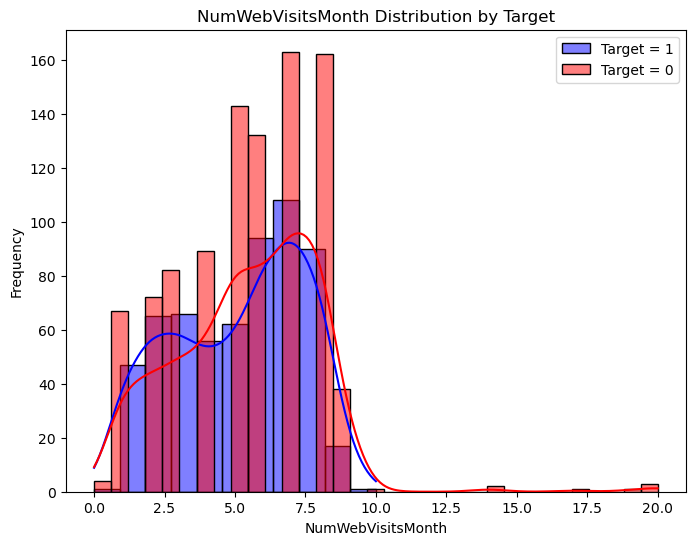

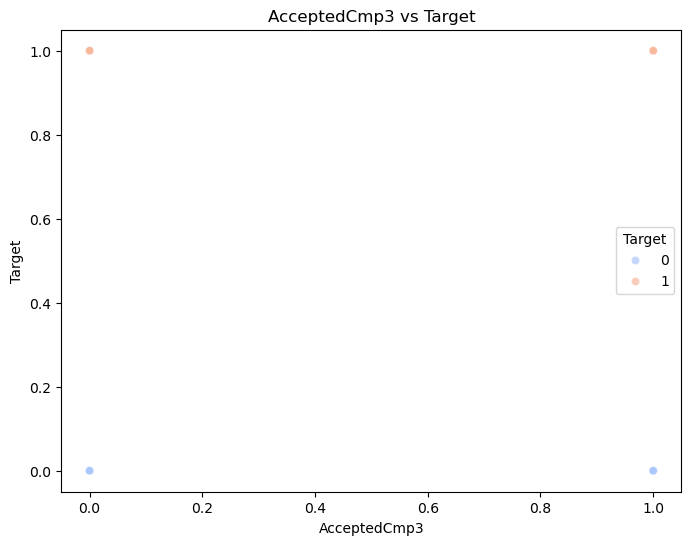

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


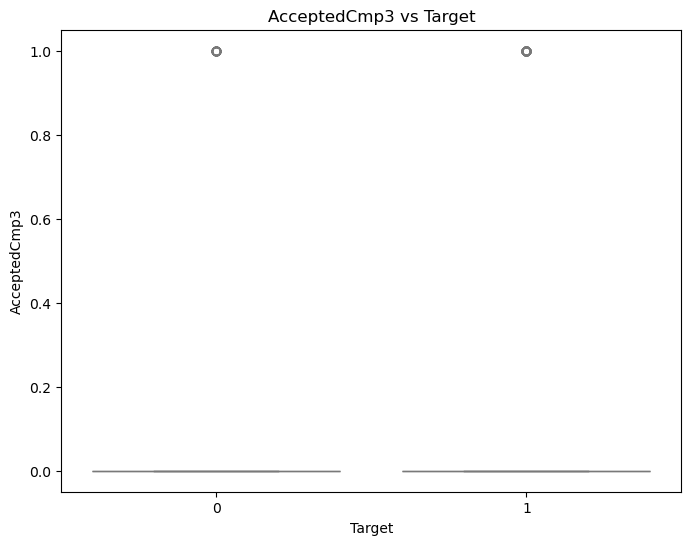

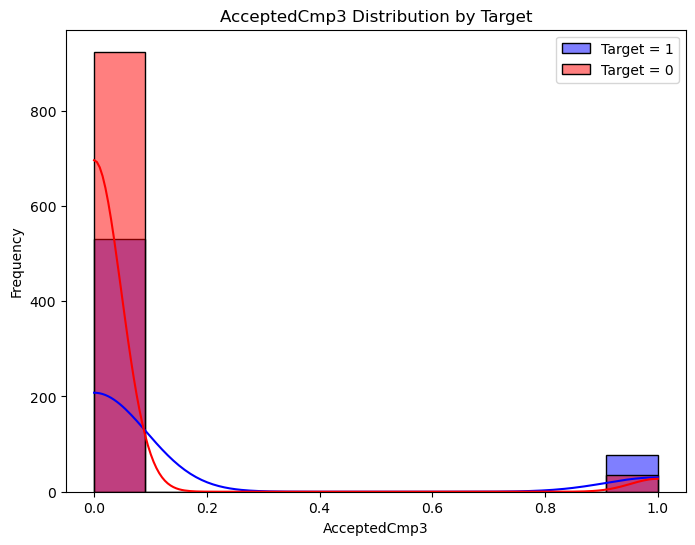

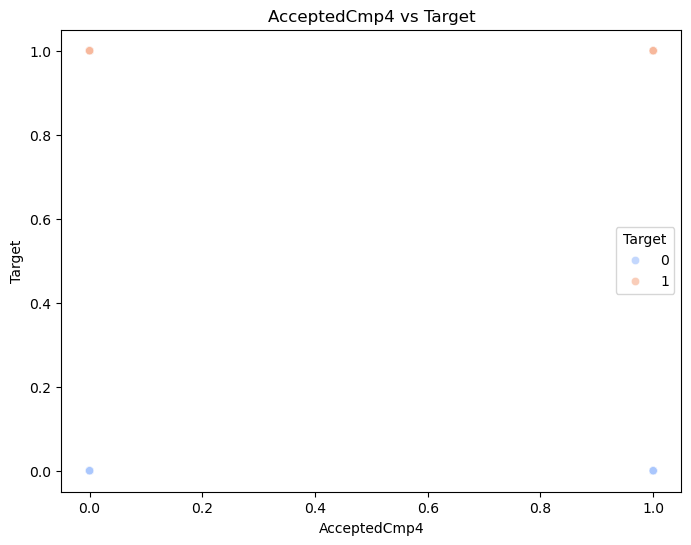

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


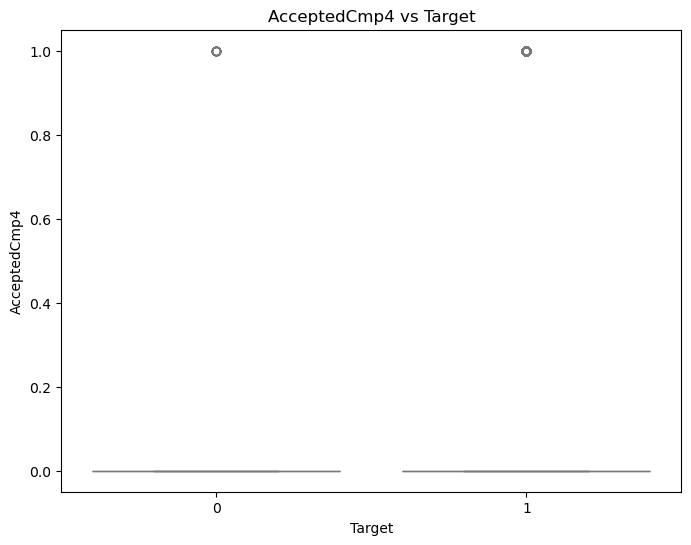

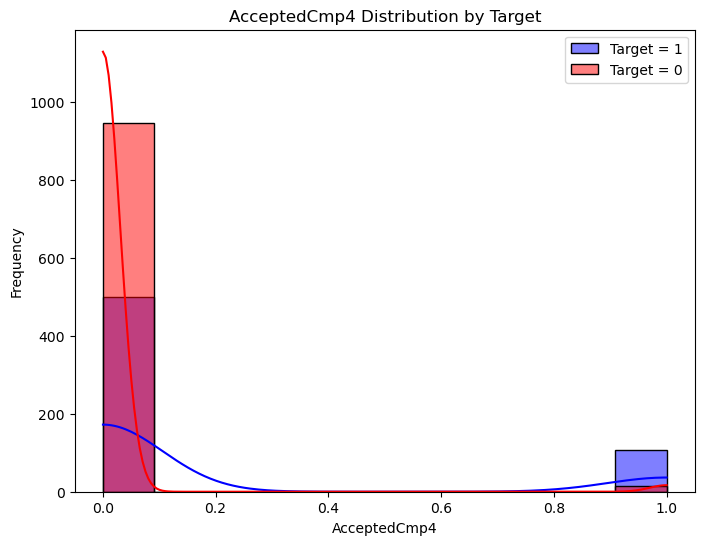

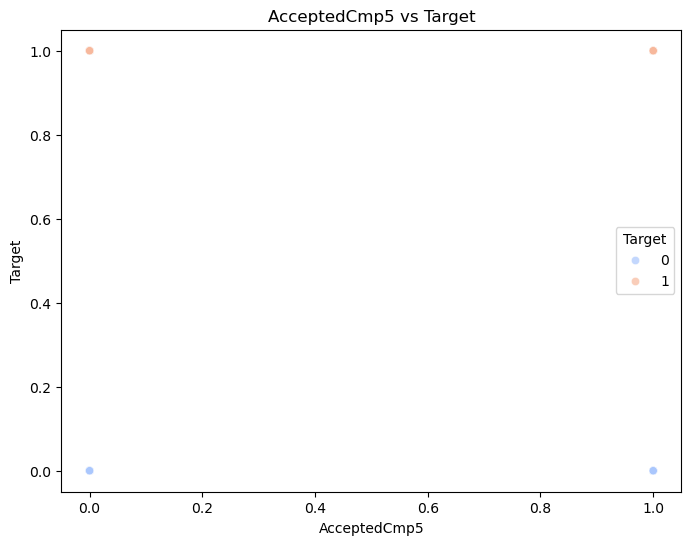

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


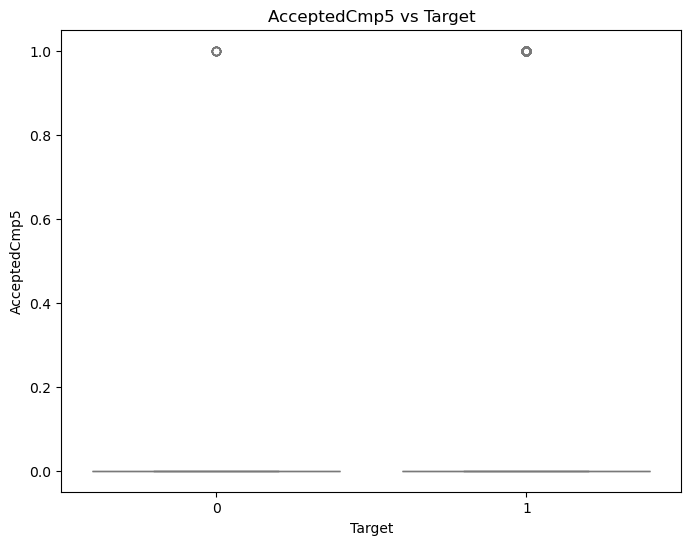

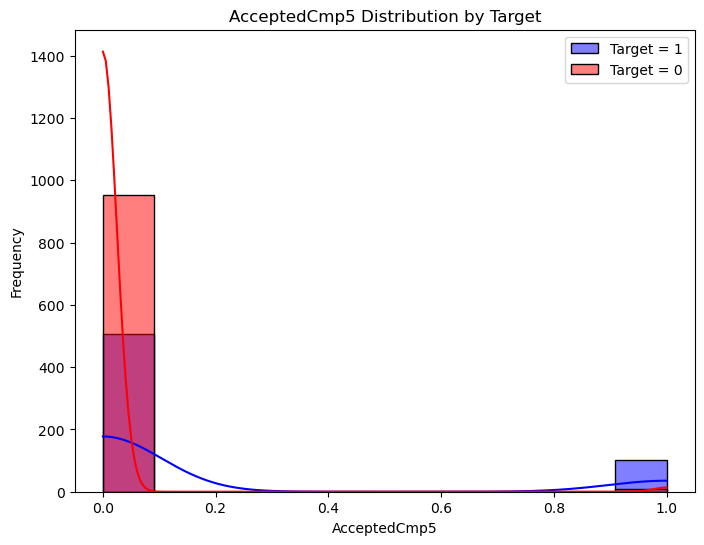

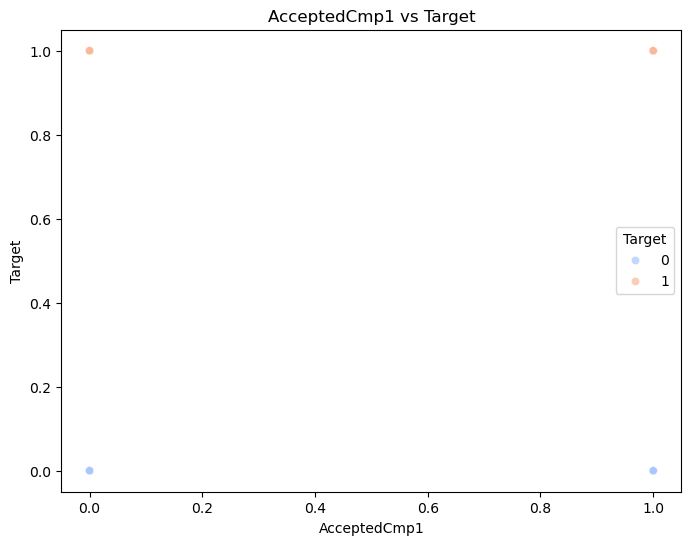

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


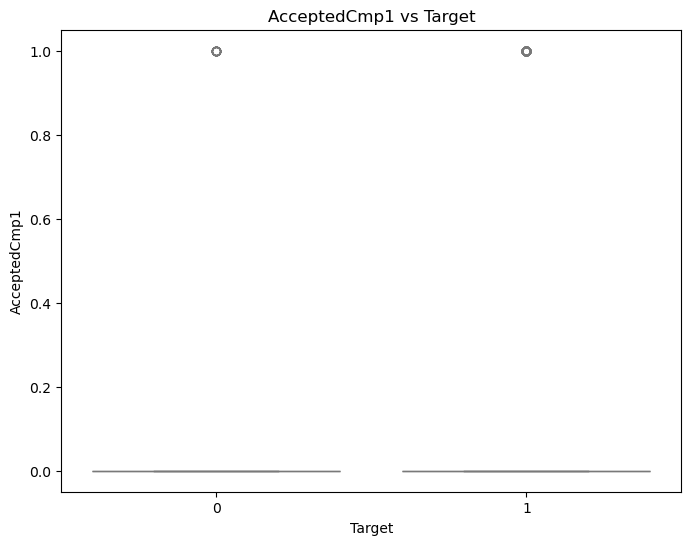

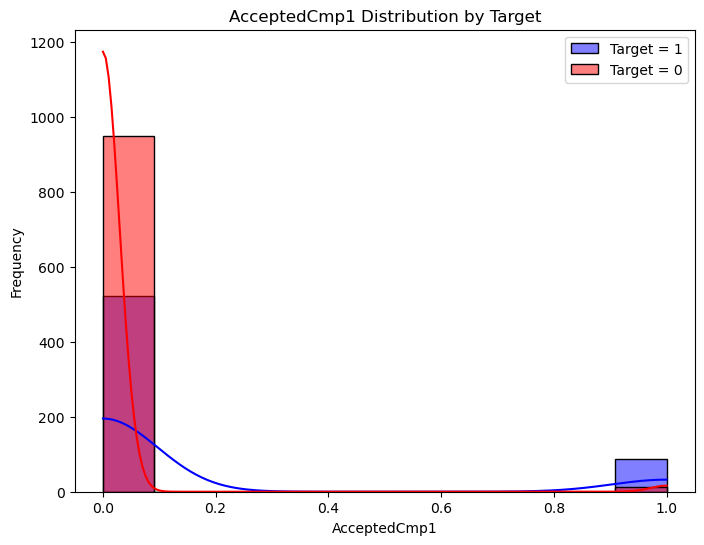

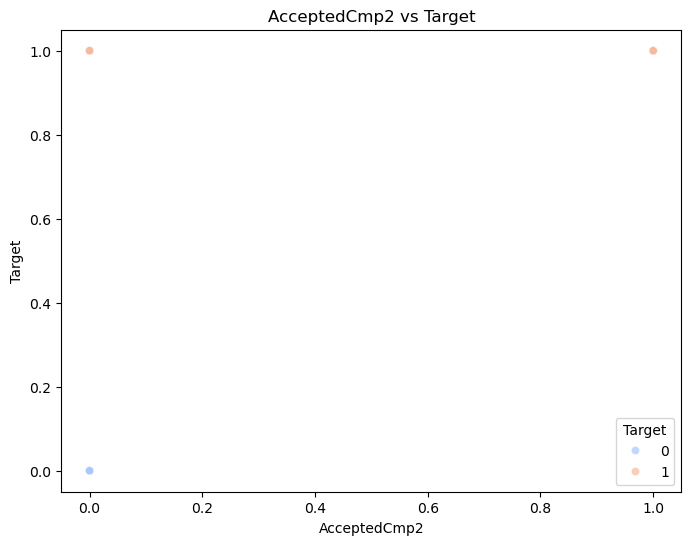

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


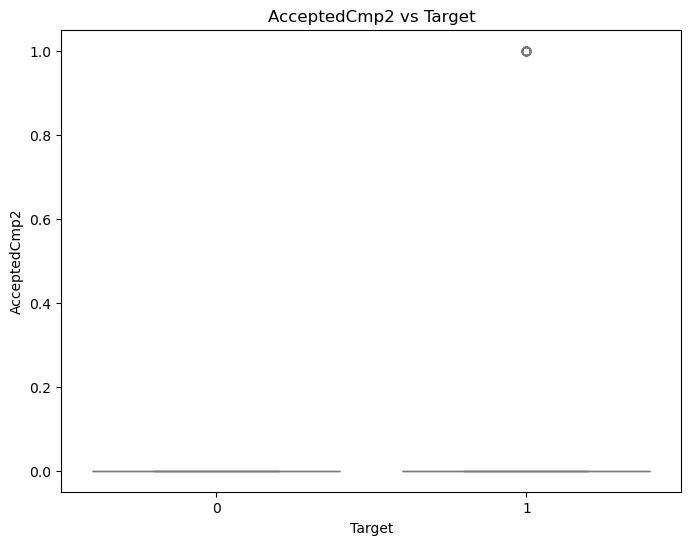

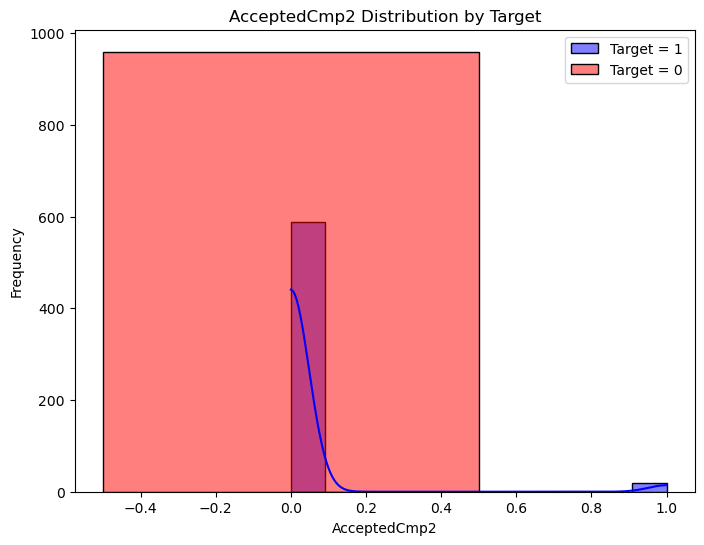

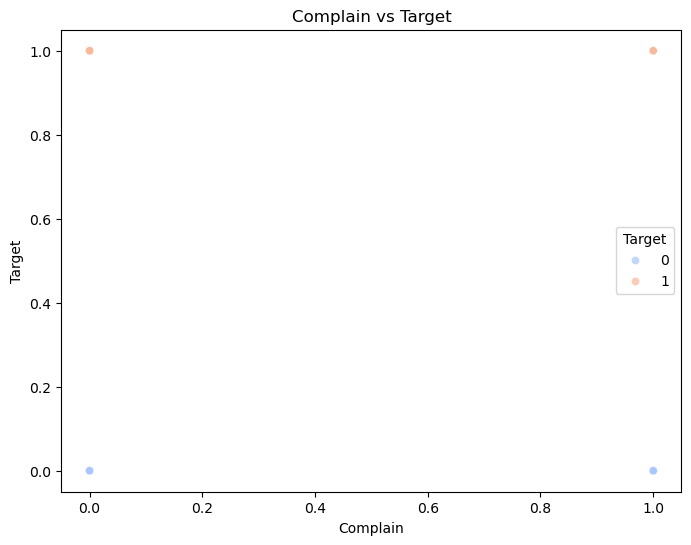

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


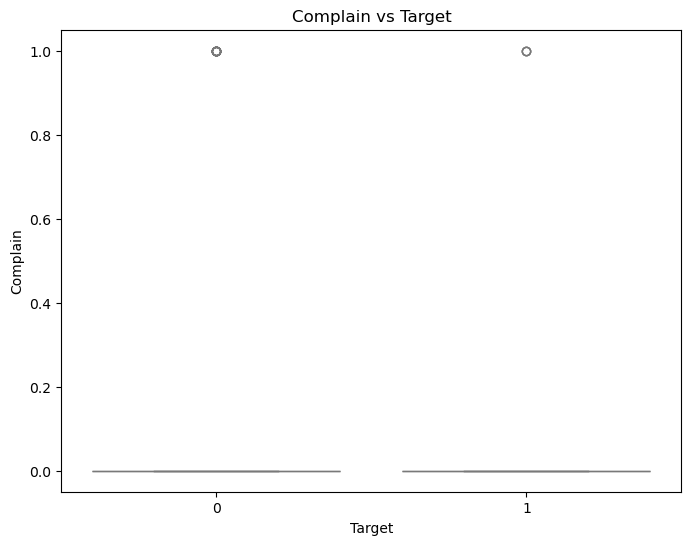

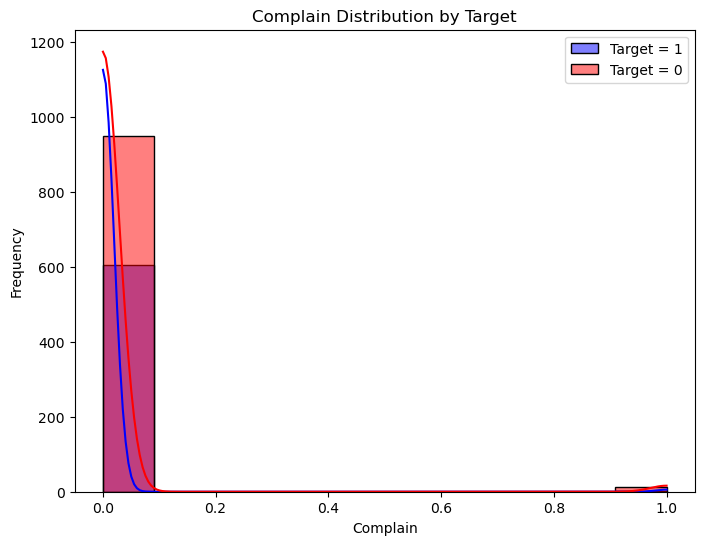

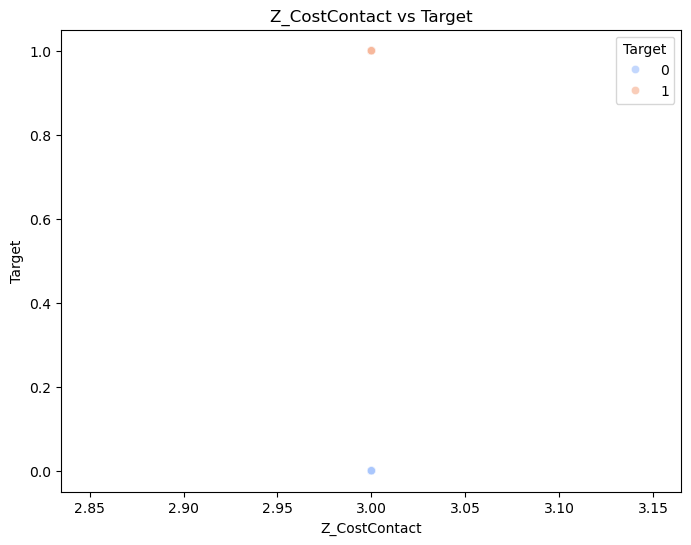

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


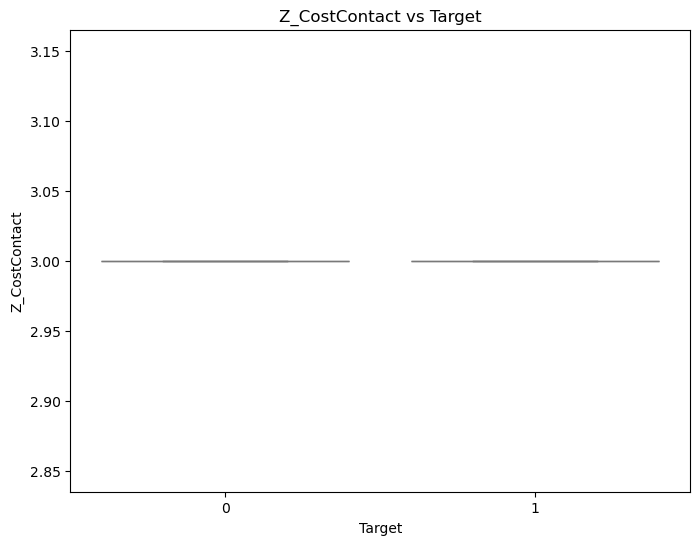

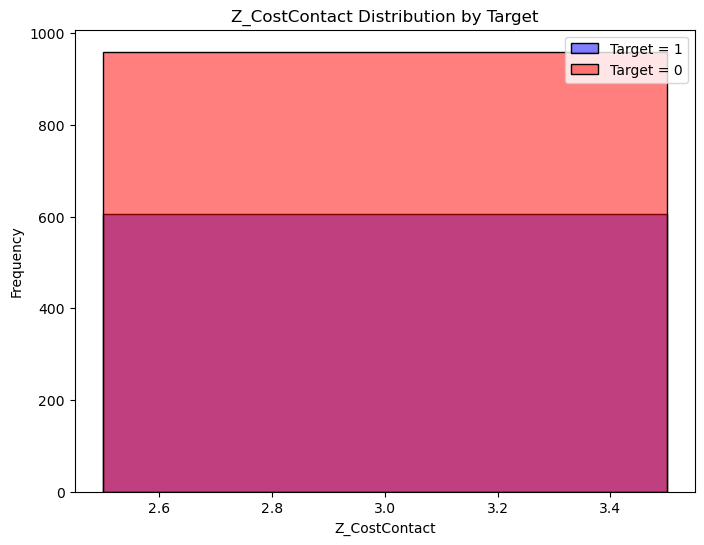

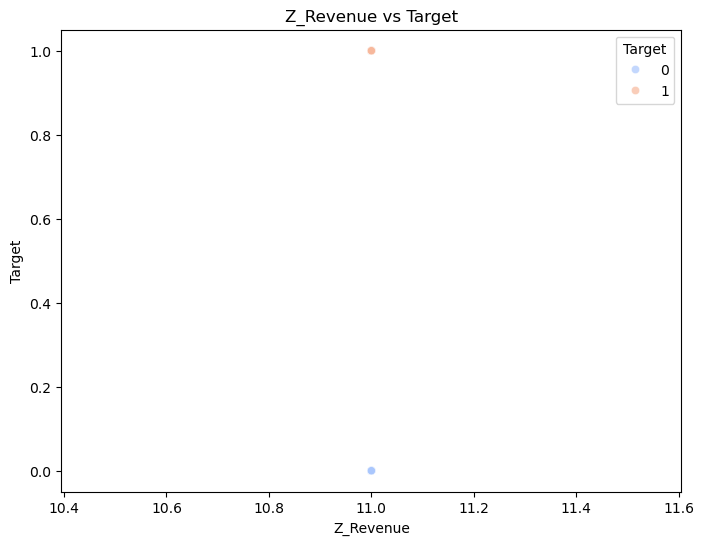

C:\Users\monar\AppData\Local\Temp\ipykernel_13656\3884536561.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')


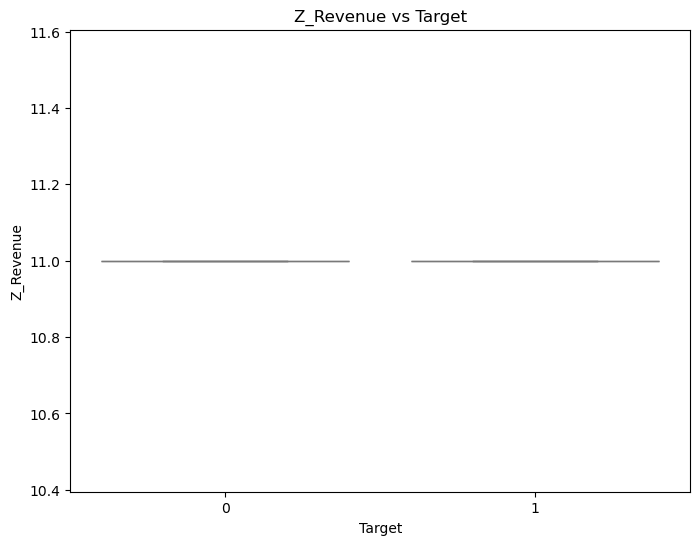

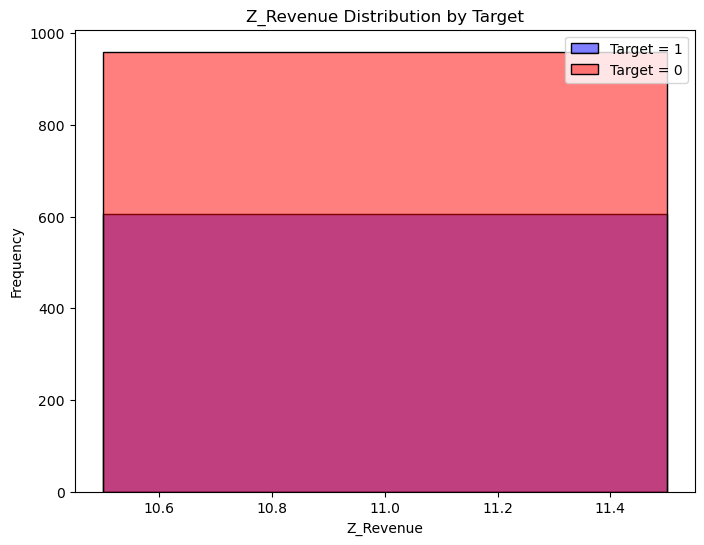

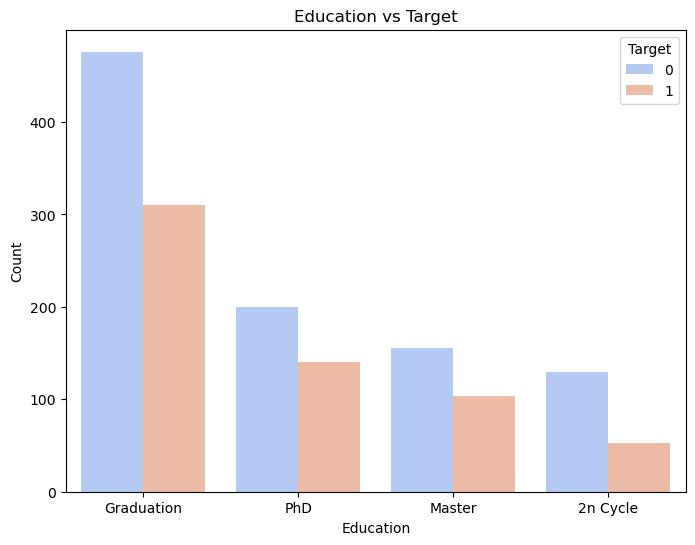

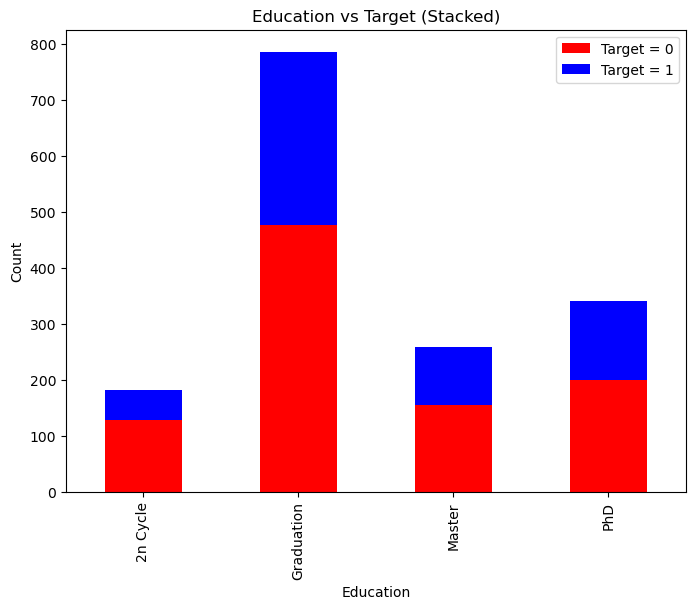

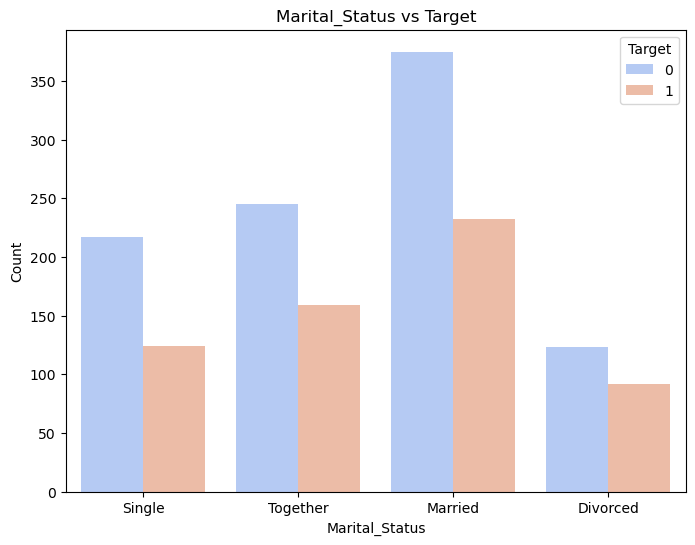

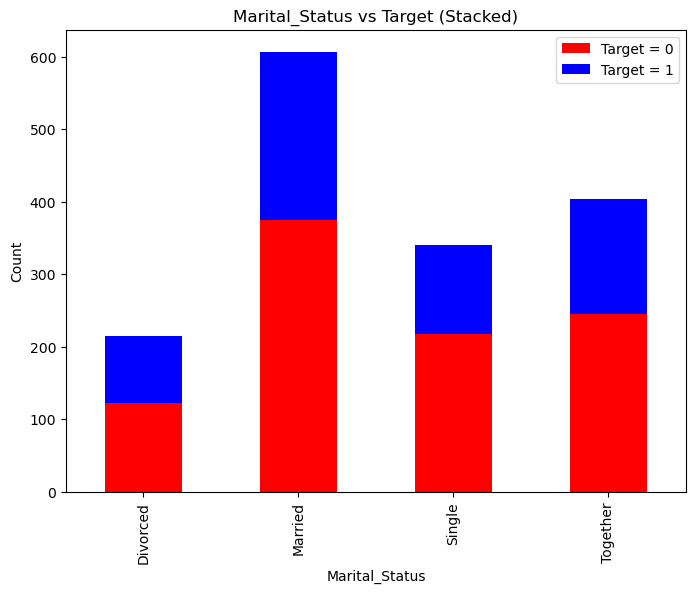

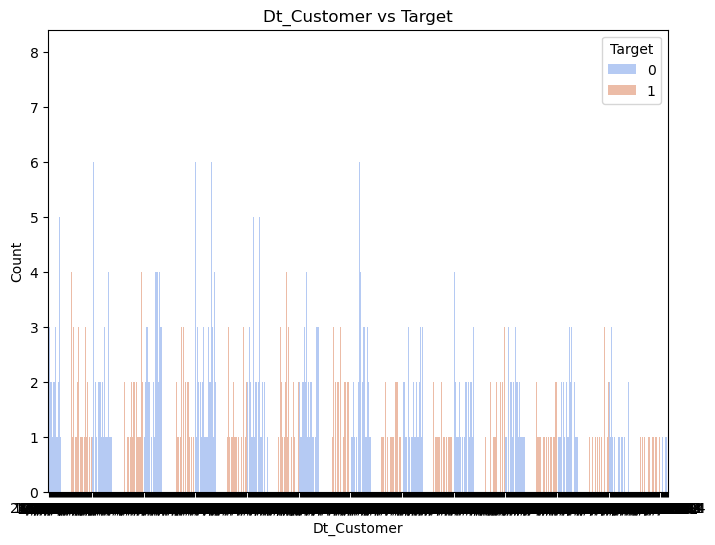

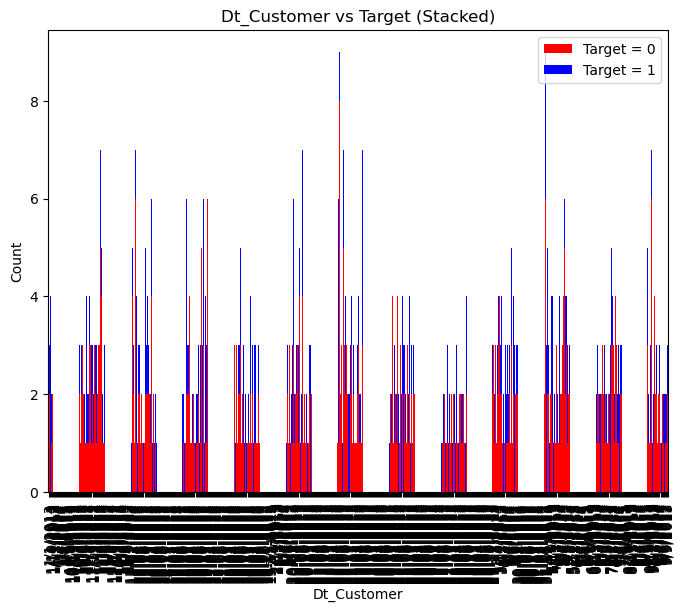

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your data is stored in a pandas DataFrame called 'data'
data = train.copy()

# Identify categorical columns (if there are any, excluding the target column)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
# categorical_columns.remove('Target')

# Identify numerical columns (excluding the target column)
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Target')

# Loop through numerical columns and create plots
for feature in numerical_columns:
    plt.figure(figsize=(8, 6))
    
    # Scatter plot (with color by Target class)
    sns.scatterplot(x=data[feature], y=data['Target'], hue=data['Target'], palette='coolwarm', alpha=0.7)
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target')
    plt.show()
    
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Target'], y=data[feature], palette='coolwarm')
    plt.title(f'{feature} vs Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()

    # Histogram by Target classes (using transparency)
    plt.figure(figsize=(8, 6))
    sns.histplot(data[data['Target'] == 1][feature], kde=True, color='blue', label='Target = 1', alpha=0.5)
    sns.histplot(data[data['Target'] == 0][feature], kde=True, color='red', label='Target = 0', alpha=0.5)
    plt.title(f'{feature} Distribution by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Loop through categorical columns and create plots
for feature in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # Count plot (using hue to separate by Target class)
    sns.countplot(x=feature, hue='Target', data=data, palette='coolwarm')
    plt.title(f'{feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
    
    # Stacked Bar plot
    feature_target = data.groupby([feature, 'Target']).size().unstack().fillna(0)
    feature_target.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'blue'])
    plt.title(f'{feature} vs Target (Stacked)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(['Target = 0', 'Target = 1'])
    plt.show()


In [5]:
lists = [
    'Year_Birth',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dates',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Complain',
    'Education',
    'Marital_Status',
    'Target'
]

In [6]:
means = train.mean(numeric_only=True)


In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
# default_list = [1]*23
default_list = means[lists[:-3]]

class Imputation_layer(nn.Module):
    def __init__(self):
        super(Imputation_layer, self).__init__()
        self.impute = nn.Parameter(torch.tensor(default_list, dtype=torch.float32), requires_grad=True)
    def forward(self, x):
        mask = torch.isnan(x)
        # print(x.shape, self.impute.shape)
        # print(mask.shape)
        x[mask] = self.impute.expand(x.shape[0], -1)[mask]
        return x
class TrainableScaler(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.mean = nn.Parameter(torch.zeros(num_features))
        self.std = nn.Parameter(torch.ones(num_features))

    def forward(self, x):
        return (x - self.mean) / (self.std + 1e-6)
    
class Model0(nn.Module):
    def __init__(self, in_features=34, layers_list=[64,128,128,64,32]):
        super(Model0, self).__init__()
        self.imputer = Imputation_layer()
        self.scaler = TrainableScaler(in_features-11)
        # self.edu_linear = nn.Linear(5, 5)
        self.edu_linear = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
        )
        # self.marital_linear = nn.Linear(6, 6)
        self.marital_linear = nn.Sequential(
            nn.Linear(5, 10),
            nn.ReLU(),
        )
        self.main_linears = nn.Sequential(
            nn.Linear(in_features - 11 + 20, layers_list[0]),
            nn.ReLU(),
        )
        for i in range(1,len(layers_list)):
            self.main_linears.append(nn.Linear(layers_list[i-1], layers_list[i]))
            self.main_linears.append(nn.ReLU())
        final_fc = nn.Linear(layers_list[-1], 1)
        self.main_linears.append(final_fc)
        self.main_linears.append(nn.Sigmoid())
        

    def forward(self, x):
        x_num = torch.cat(x[:-2])
        x_num = torch.transpose(x_num, 0, 1)
        x_num = x_num.float()
        x_edu = torch.transpose(x[-2], 0, 1)
        x_marital = torch.transpose(x[-1], 0, 1)
        x_num = self.imputer(x_num)
        x_num = self.scaler(x_num)
        x_edu = self.edu_linear(x_edu).squeeze(1)
        # x_marital = self.marital_linear(x_marital).squeeze(1)
        # print(x_num.shape, x_edu.shape, x_marital.shape)
        # x = torch.cat((x_num, x_edu, x_marital), dim=1)
        x = torch.cat((x_num, x_edu), dim=1)
        x = self.main_linears(x)
        return x[:,0]

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Assume you have computed default imputation values for numeric columns.
# In your case, there are 23 numeric features.
# For example, default_list can be computed from the means of these columns.
# default_list = [1.0] * 23  # Replace with your computed values if available.

###############################################################################
# Trainable imputation layer for numeric features
###############################################################################
class ImputationLayer(nn.Module):
    def __init__(self, impute_init):
        super(ImputationLayer, self).__init__()
        # impute_init: list of length 23 for numeric features.
        self.impute = nn.Parameter(torch.tensor(impute_init, dtype=torch.float32))
    
    def forward(self, x):
        # x: [b, 23]
        mask = torch.isnan(x)
        # Expand imputation parameters to match batch dimension
        impute_values = self.impute.unsqueeze(0).expand_as(x)
        # Replace NaNs with trainable imputation values
        return torch.where(mask, impute_values, x)

###############################################################################
# Trainable scaler for numeric features (learnable mean and std)
###############################################################################
class TrainableScaler(nn.Module):
    def __init__(self, num_features):
        super(TrainableScaler, self).__init__()
        self.mean = nn.Parameter(torch.zeros(num_features))
        self.std = nn.Parameter(torch.ones(num_features))
    
    def forward(self, x):
        return (x - self.mean) / (self.std + 1e-6)

###############################################################################
# Improved model for a list of 25 inputs as specified
###############################################################################
class Model0(nn.Module):
    def __init__(self, 
                 in_numeric=23,        # numeric features count
                 cat_dim=5,            # each categorical input is of dimension 5
                 layers_list=[128, 256, 256, 128, 64, 32],  # main network hidden layers
                 impute_init=None):
        super(Model0, self).__init__()
        
        if impute_init is None:
            impute_init = [1.0] * in_numeric
        
        # Numeric branch: imputation then scaling.
        self.imputer = ImputationLayer(impute_init)
        self.scaler  = TrainableScaler(in_numeric)
        
        # Categorical branches: Process each of the last 2 inputs.
        # We assume each categorical input is a tensor of shape [b, 5] after squeezing.
        # We'll project them to a 10-dimensional output.
        self.edu_linear = nn.Sequential(
            nn.Linear(cat_dim, 10),
            nn.BatchNorm1d(10),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        self.marital_linear = nn.Sequential(
            nn.Linear(cat_dim, 10),
            nn.BatchNorm1d(10),
            nn.ReLU(),
            nn.Dropout(0.2)
        )
        
        # Combined input dimension after processing:
        # Numeric: 23, Education: 10, Marital: 10 → 23+10+10 = 43.
        combined_input_dim = in_numeric + 10 + 10
        
        # Build the main fully connected network.
        layers = []
        current_dim = combined_input_dim
        for hidden_dim in layers_list:
            layers.append(nn.Linear(current_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))
            current_dim = hidden_dim
        # Final output layer for a binary target.
        layers.append(nn.Linear(current_dim, 1))
        layers.append(nn.Sigmoid())
        self.main_linears = nn.Sequential(*layers)
    
    def forward(self, x):
        """
        x: a list of 25 elements
           - Elements 0 to 22: numeric features, each of shape [1, b]
           - Element 23: first categorical feature, shape [1, b, 5]
           - Element 24: second categorical feature, shape [1, b, 5]
        The batch dimension is assumed to be in the second position in the numeric inputs.
        """
        # Process numeric features: stack elements 0 to 22.
        numeric_list = []
        for i in range(23):
            # Squeeze the first dimension so each tensor becomes [b] then unsqueeze to [b, 1]
            numeric_i = x[i].squeeze(0).unsqueeze(1)
            numeric_list.append(numeric_i)
        # Concatenate along feature dimension: shape becomes [b, 23]
        x_num = torch.cat(numeric_list, dim=1)
        
        # Process categorical features (element 23 and 24).
        # Each is of shape [1, b, 5]; squeeze the first dimension → [b, 5]
        x_edu = x[23].squeeze(0)
        x_marital = x[24].squeeze(0)
        
        # Numeric branch processing.
        x_num = self.imputer(x_num)  # impute NaNs, shape [b, 23]
        x_num = self.scaler(x_num)   # scale numerics, shape [b, 23]
        
        # Process categorical branches.
        # Note: BatchNorm1d expects the batch dimension first.
        x_edu = self.edu_linear(x_edu)         # shape [b, 10]
        x_marital = self.marital_linear(x_marital)  # shape [b, 10]
        
        # Concatenate numeric and categorical outputs: shape [b, 23+10+10] = [b, 43]
        x_combined = torch.cat([x_num, x_edu, x_marital], dim=1)
        
        # Feed into main network.
        out = self.main_linears(x_combined)  # shape [b, 1]
        return out.squeeze(1)  # final output shape: [b]

# Example usage:
if __name__ == '__main__':
    # Assume b (batch dimension) is, for example, 4.
    b = 4
    # Create dummy inputs.
    # For numeric inputs: list of 23 tensors, each shape [1, b]
    numeric_inputs = [torch.randn(1, b) for _ in range(23)]
    
    # For categorical inputs: 2 tensors, each shape [1, b, 5]
    cat_input1 = torch.randn(1, b, 5)
    cat_input2 = torch.randn(1, b, 5)
    
    # Create the list of inputs: total 25 elements.
    inputs = numeric_inputs + [cat_input1, cat_input2]
    
    model = Model0(in_numeric=23, cat_dim=5,
                   layers_list=[128, 256, 256, 128, 64, 32],
                   impute_init=[1.0]*23)
    
    output = model(inputs)
    print("Output shape:", output.shape)  # Expected: [b], i.e. [4]


Output shape: torch.Size([4])


In [25]:
test_case = []
lists = [
    'Year_Birth',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dates',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Complain',
    'Education',
    'Marital_Status',
    'Target'
]
for i in lists:
    test_case.append(torch.tensor(train[i][:2], dtype=torch.float32).unsqueeze(0))

In [14]:
test_case

[tensor([[1957., 1954.]]),
 tensor([[58138., 46344.]]),
 tensor([[0., 1.]]),
 tensor([[0., 1.]]),
 tensor([[ 92., 938.]]),
 tensor([[58., 38.]]),
 tensor([[635.,  11.]]),
 tensor([[88.,  1.]]),
 tensor([[546.,   6.]]),
 tensor([[172.,   2.]]),
 tensor([[88.,  1.]]),
 tensor([[88.,  6.]]),
 tensor([[8., 1.]]),
 tensor([[10.,  1.]]),
 tensor([[4., 2.]]),
 tensor([[3., 2.]]),
 tensor([[7., 5.]]),
 tensor([[0., 0.]]),
 tensor([[0., 0.]]),
 tensor([[0., 0.]]),
 tensor([[0., 0.]]),
 tensor([[0., 0.]]),
 tensor([[0., 0.]]),
 tensor([[[1., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0.]]]),
 tensor([[[1., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0.]]])]

In [18]:
# model = Model0(in_features=34, layers_list=[64,128,256,128,64,32])
model(test_case).shape

torch.Size([2])

In [19]:
from torchinfo import summary


summary(model)

Layer (type:depth-idx)                   Param #
Model0                                   --
├─ImputationLayer: 1-1                   23
├─TrainableScaler: 1-2                   46
├─Sequential: 1-3                        --
│    └─Linear: 2-1                       60
│    └─BatchNorm1d: 2-2                  20
│    └─ReLU: 2-3                         --
│    └─Dropout: 2-4                      --
├─Sequential: 1-4                        --
│    └─Linear: 2-5                       60
│    └─BatchNorm1d: 2-6                  20
│    └─ReLU: 2-7                         --
│    └─Dropout: 2-8                      --
├─Sequential: 1-5                        --
│    └─Linear: 2-9                       5,632
│    └─BatchNorm1d: 2-10                 256
│    └─ReLU: 2-11                        --
│    └─Dropout: 2-12                     --
│    └─Linear: 2-13                      33,024
│    └─BatchNorm1d: 2-14                 512
│    └─ReLU: 2-15                        --
│    └─Dropout: 2-

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import pandas as pd
import numpy as np

class CustomDataset(Dataset):
    def __init__(self, dataframe: pd.DataFrame, columns: list):
        self.data = dataframe[columns].copy()
        self.columns = columns

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        tensor_list = [torch.tensor(row[col], dtype=torch.float32) for col in self.columns]
        return tensor_list

def get_dataloaders(df, columns, batch_size=32, test_split=0.2, shuffle=True):
    dataset = CustomDataset(df, columns)

    # Calculate split sizes
    test_size = int(len(dataset) * test_split)
    train_size = len(dataset) - test_size

    train_ds, test_ds = random_split(dataset, [train_size, test_size])

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=shuffle, collate_fn=lambda x: list(zip(*x)))
    test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False, collate_fn=lambda x: list(zip(*x)))

    return train_loader, test_loader



In [35]:
train_loader, test_loader = get_dataloaders(train, lists, batch_size=64, test_split=0.3, shuffle=True)

# Accessing one batch
for batch in test_loader:
    # Each batch[i] is a tuple of tensors for the i-th column4
    # Convert to tensors if needed
    batch = [torch.stack(col).unsqueeze(0) for col in batch]
    # print(batch[0].shape)  # list of tensors
    break

In [ ]:
import torch
from tqdm import tqdm

def train_one_epoch(model, dataloader, optimizer, loss_fn, device='cuda'):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    pbar = tqdm(dataloader, desc="Training", leave=False)

    for batch in pbar:
        inputs = [torch.stack(col).unsqueeze(0).to(device) for col in batch[:-1]]
        # inputs = torch.cat(inputs, dim=1)
        if inputs[0].shape[1] == 1:
            continue
        targets = torch.stack(batch[-1]).to(device).float().squeeze()
        # print(inputs[0].shape, targets.shape)

        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = (outputs > 0.5).float()
        correct += (preds == targets).sum().item()
        total += targets.size(0)

        acc = correct / total if total > 0 else 0
        pbar.set_postfix(loss=loss.item(), accuracy=acc)

    avg_loss = running_loss / len(dataloader)
    avg_acc = correct / total
    return avg_loss, avg_acc


def evaluate(model, dataloader, loss_fn, device='cuda'):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in dataloader:
            inputs = [torch.stack(col).unsqueeze(0).to(device) for col in batch[:-1]]
            # inputs = torch.cat(inputs, dim=1)
            if inputs[0].shape[1] == 1:
                continue
            targets = torch.stack(batch[-1]).to(device).float().squeeze()
            # print(inputs[0].shape, targets.shape)
            outputs = model(inputs).squeeze()
            loss = loss_fn(outputs, targets)

            total_loss += loss.item()

            preds = (outputs > 0.5).float()
            correct += (preds == targets).sum().item()
            total += targets.size(0)

    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy


In [34]:
# model = Model0(in_features=34, layers_list=[64,64,128,256,256,128,32]).to('cuda')
model = Model0(in_numeric=23, cat_dim=5,
               layers_list=[256, 512, 512, 256, 128, 64, 32],
               impute_init=[1.0]*23)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = Model0().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.BCELoss()

num_epochs = 10

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = evaluate(model, test_loader, loss_fn, device)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")


In [ ]:
from torchinfo import summary
summary(model)

In [111]:
import torch
import os

device = 'cuda' if torch.cuda.is_available() else 'cpu'
# model = Model0().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = torch.nn.BCELoss()

num_epochs = 10
# best_score = 0.0 # to store the best min(train_acc, val_acc)
checkpoint_path = "best_model.pt"
model.to(device)
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    
    train_loss, train_acc = train_one_epoch(model, train_loader, optimizer, loss_fn, device)
    val_loss, val_acc = evaluate(model, test_loader, loss_fn, device)

    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} | Val   Acc: {val_acc:.4f}")
    
    # Check if this epoch's min(train_acc, val_acc) is the best so far
    score = min(train_acc, val_acc)
    if score > best_score:
        best_score = score
        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_acc': train_acc,
            'val_acc': val_acc,
            'loss': val_loss,
        }, checkpoint_path)
        print(f"✅ Checkpoint saved at epoch {epoch+1} (min acc: {score:.4f})")



Epoch 1/10


Train Loss: 0.3087 | Train Acc: 0.8541
Val   Loss: 0.4432 | Val   Acc: 0.8085

Epoch 2/10


Train Loss: 0.2980 | Train Acc: 0.8624
Val   Loss: 0.4461 | Val   Acc: 0.8234

Epoch 3/10


Train Loss: 0.3071 | Train Acc: 0.8459
Val   Loss: 0.4213 | Val   Acc: 0.8340

Epoch 4/10


Train Loss: 0.2993 | Train Acc: 0.8605
Val   Loss: 0.3888 | Val   Acc: 0.8255

Epoch 5/10


Train Loss: 0.3165 | Train Acc: 0.8469
Val   Loss: 0.4780 | Val   Acc: 0.8255

Epoch 6/10


Train Loss: 0.3420 | Train Acc: 0.8496
Val   Loss: 0.3924 | Val   Acc: 0.8404

Epoch 7/10


Train Loss: 0.2885 | Train Acc: 0.8760
Val   Loss: 0.3977 | Val   Acc: 0.8213

Epoch 8/10


Train Loss: 0.3071 | Train Acc: 0.8514
Val   Loss: 0.4266 | Val   Acc: 0.8277

Epoch 9/10


Train Loss: 0.3155 | Train Acc: 0.8514
Val   Loss: 0.4620 | Val   Acc: 0.7830

Epoch 10/10


Train Loss: 0.3089 | Train Acc: 0.8633
Val   Loss: 0.4263 | Val   Acc: 0.8128


In [103]:
optimizer.load_state_dict(torch.load(checkpoint_path)['optimizer_state_dict'])
model.load_state_dict(torch.load(checkpoint_path)['model_state_dict'])

C:\Users\monar\AppData\Local\Temp\ipykernel_21952\4085352592.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  optimizer.load_state_dict(torch.load(checkpoint_path)['optim

<All keys matched successfully>

In [115]:
model.load_state_dict(torch.load(checkpoint_path)['model_state_dict'])
model.eval()

C:\Users\monar\AppData\Local\Temp\ipykernel_21952\1188143922.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path)['model_sta

Model0(
  (imputer): ImputationLayer()
  (scaler): TrainableScaler()
  (edu_linear): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (marital_linear): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
  )
  (main_linears): Sequential(
    (0): Linear(in_features=43, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=256, out_features=512, bias=True)
    (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linea

In [ ]:
# Feature lists based on notebook analysis
NUMERICAL_COLS = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dates', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumDealsPurchases', 'NumWebVisitsMonth', 'AcceptedCmp1',
    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain'
]
EDU_COL = 'Education'
MARITAL_COL = 'Marital_Status'
TARGET_COL = 'Target'
DATE_COL = 'Dt_Customer'
ID_COL = 'ID'  # ID column for submission file

N_NUM_FEATURES = len(NUMERICAL_COLS) # Should be 23
N_EDU_FEATURES = 5 # Based on notebook encoding
N_MARITAL_FEATURES = 6 # Based on notebook encoding
TOTAL_FEATURES = N_NUM_FEATURES + N_EDU_FEATURES + N_MARITAL_FEATURES # Should be 34

def preprocess_data(df):
    """Applies preprocessing steps from the notebook."""
    df_processed = df.copy()

    # Keep the ID column for later if it exists
    id_values = None
    if ID_COL in df_processed.columns:
        id_values = df_processed[ID_COL].copy()

    # 1. Handle Date Feature ('Dt_Customer')
    try:
        df_processed['Dt_Customer_1'] = pd.to_datetime(df_processed[DATE_COL], format='mixed', errors='coerce')
        min_date = df_processed['Dt_Customer_1'].min()
        df_processed['Dates'] = (df_processed['Dt_Customer_1'] - min_date).dt.days
    except Exception as e:
        print(f"Error processing date column {DATE_COL}: {e}")
        # Handle cases where date conversion might fail entirely - fill with 0 or median?
        df_processed['Dates'] = 0 # Simple fallback

    # Check for NaNs introduced by date conversion errors
    if df_processed['Dates'].isnull().any():
        print(f"Warning: NaNs found in 'Dates' column after conversion. Filling with 0.")
        df_processed['Dates'].fillna(0, inplace=True)


    # 2. Handle Categorical Features ('Education', 'Marital_Status')
    # Define mappings (ensure consistency with notebook)
    unique_edu = df_processed[EDU_COL].unique()
    unique_marital = df_processed[MARITAL_COL].unique()

    # Handle potential NaNs in categorical columns before mapping
    if df_processed[EDU_COL].isnull().any():
        print(f"Warning: NaNs found in {EDU_COL}. Filling with a placeholder 'Unknown'.")
        df_processed[EDU_COL].fillna('Unknown', inplace=True)
        if 'Unknown' not in unique_edu:
             unique_edu = np.append(unique_edu, 'Unknown')

    if df_processed[MARITAL_COL].isnull().any():
        print(f"Warning: NaNs found in {MARITAL_COL}. Filling with a placeholder 'Unknown'.")
        df_processed[MARITAL_COL].fillna('Unknown', inplace=True)
        if 'Unknown' not in unique_marital:
             unique_marital = np.append(unique_marital, 'Unknown')


    Education_map = {category: [1 if i == idx else 0 for i in range(N_EDU_FEATURES)] # Use fixed size
                     for idx, category in enumerate(unique_edu) if idx < N_EDU_FEATURES}
    Marital_status_map = {category: [1 if i == idx else 0 for i in range(N_MARITAL_FEATURES)] # Use fixed size
                          for idx, category in enumerate(unique_marital) if idx < N_MARITAL_FEATURES}

    # Add default mapping for any unexpected values (e.g., 'Unknown' if it exceeds N_EDU_FEATURES)
    default_edu_encoding = [0] * N_EDU_FEATURES
    default_marital_encoding = [0] * N_MARITAL_FEATURES

    df_processed[EDU_COL] = df_processed[EDU_COL].apply(lambda x: Education_map.get(x, default_edu_encoding))
    df_processed[MARITAL_COL] = df_processed[MARITAL_COL].apply(lambda x: Marital_status_map.get(x, default_marital_encoding))


    # Ensure the lengths match the model definition (handle potential discrepancies)
    # Note: Mapping logic now uses fixed N_EDU_FEATURES/N_MARITAL_FEATURES
    # if len(unique_edu) > N_EDU_FEATURES:
    #      print(f"Warning: More unique Education levels found ({len(unique_edu)}) than expected ({N_EDU_FEATURES}). Check data/mapping.")
    # if len(unique_marital) > N_MARITAL_FEATURES:
    #      print(f"Warning: More unique Marital Statuses found ({len(unique_marital)}) than expected ({N_MARITAL_FEATURES}). Check data/mapping.")

    # Keep only necessary columns (features + target)
    all_feature_cols = NUMERICAL_COLS + [EDU_COL, MARITAL_COL]
    if TARGET_COL in df_processed.columns:
        final_cols = all_feature_cols + [TARGET_COL]
    else:
        final_cols = all_feature_cols # For test data

    # Check if all expected columns exist after potential removals/errors
    missing_cols = [col for col in final_cols if col not in df_processed.columns]
    if missing_cols:
        print(f"Error: The following columns are missing after preprocessing: {missing_cols}")
        # Decide how to handle this, e.g., raise error or try to continue
        raise ValueError(f"Missing columns after preprocessing: {missing_cols}")

    df_final = df_processed[final_cols].copy()

    # Note: Imputation is handled by the Imputation_layer within the model

    return df_final, id_values

In [ ]:
class CustomerDataset(Dataset):
    def __init__(self, dataframe):
        self.dataframe = dataframe

        # Extract features and target, convert to numpy for efficiency
        self.numerical_features = self.dataframe[NUMERICAL_COLS].values.astype(np.float32)
        # Stack the list of lists into a 2D numpy array
        self.edu_features = np.array(self.dataframe[EDU_COL].tolist(), dtype=np.float32)
        self.marital_features = np.array(self.dataframe[MARITAL_COL].tolist(), dtype=np.float32)

        if TARGET_COL in self.dataframe.columns:
            self.targets = self.dataframe[TARGET_COL].values.astype(np.float32)
        else:
            self.targets = None # No targets in test set

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        num = torch.tensor(self.numerical_features[idx, :], dtype=torch.float32)
        edu = torch.tensor(self.edu_features[idx, :], dtype=torch.float32)
        mar = torch.tensor(self.marital_features[idx, :], dtype=torch.float32)

        if self.targets is not None:
            target = torch.tensor([self.targets[idx]], dtype=torch.float32) # Shape [1] for BCEWithLogitsLoss
            return num, edu, mar, target
        else:
            return num, edu, mar # Return only features for test set

In [ ]:
def predict(model, test_loader, device):
    """Generate predictions using a trained model."""
    model.eval()  # Set model to evaluation mode
    all_predictions = []

    with torch.no_grad():  # No need to track gradients
        for batch_data in test_loader:
            # Adjust for the new model's forward method
            # Move all inputs to device
            inputs = [x.to(device) for x in batch_data]
            
            # Forward pass
            outputs = model(inputs)
            
            # Convert outputs to binary predictions (model now includes sigmoid)
            predictions = (outputs >= 0.5).int().cpu().numpy()
            all_predictions.extend(predictions.tolist())
    
    return all_predictions

In [108]:
from torch.utils.data import DataLoader
# Convert predictions to a DataFrame
lists = [
    'ID',
    'Year_Birth',
    'Income',
    'Kidhome',
    'Teenhome',
    'Dates',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumDealsPurchases',
    'NumWebVisitsMonth',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'Complain',
    'Education',
    'Marital_Status'
]
test_loader_test,_ = get_dataloaders(test, lists, batch_size=1, test_split=0, shuffle=False)



In [116]:
# model.load_state_dict(torch.load(checkpoint_path)['model_state_dict'])
model.eval()
all_predictions = []
dis = {}
# with torch.no_grad():
for i in test_loader_test:

    batch = [torch.stack(col).unsqueeze(0).to(device) for col in i[1:]]
    out = model(batch)
    pred = out>0.5
    pred = pred.int().cpu().numpy()
    all_predictions.extend(pred.tolist())
    dis[i[0][0]] = pred.tolist()[0]
    # break

In [117]:

example_dict = dis
processed_dict = {key.int().item(): value for key, value in example_dict.items()}

# Create DataFrame from the dictionary items.
df = pd.DataFrame(list(processed_dict.items()), columns=["ID", "Target"])

# Sort the DataFrame by the 'ID' column.
df = df.sort_values(by="ID").reset_index(drop=True)

print(df)

        ID  Target
0       13       0
1       17       0
2       24       0
3       48       0
4       78       0
..     ...     ...
668  11092       0
669  11133       1
670  11148       0
671  11181       0
672  11187       0

[673 rows x 2 columns]


In [64]:
# model.load_state_dict(torch.load(checkpoint_path)['model_state_dict'])
full_loader = get_dataloaders(train, lists, batch_size=3, test_split=0)[0]
model.eval()
all_predictionst = []
# with torch.no_grad():
for i in full_loader:

    batch = [torch.stack(col).unsqueeze(0).to(device) for col in i]
    out = model(batch)
    pred = out>0.5
    pred = pred.int().cpu().numpy()
    all_predictionst.extend(pred.tolist())

In [61]:
submission = pd.DataFrame(all_predictionst, columns=['Target'])

In [62]:
submission

Target
0          0
1          0
2          0
3          1
4          0
...      ...
1562       0
1563       0
1564       0
1565       0
1566       0

[1567 rows x 1 columns]

In [65]:
(submission['Target'] == train['Target']).mean()

0.5552010210593491

In [73]:
submission_df = pd.DataFrame(test['ID'], columns=['ID'])
submission_df['Target'] = all_predictions


In [ ]:
submission_df

In [119]:
# hem = pd.read_csv(r'submission (5).csv')
hem = pd.read_csv(r'submission.csv')
hem = hem.sort_values(by="ID").reset_index(drop=True)


In [120]:
submission_df = df
accuracy = (submission_df['Target'] == hem['Target']).mean()
print(f"Match accuracy: {accuracy * 100:.2f}%")


Match accuracy: 91.23%


In [121]:
# write to csv
submission_df.to_csv('submission1.csv', index=False)